In [3]:
import pandas as pd

In [4]:
df=pd.read_excel(r"C:\Users\HP\Desktop\edited\merged Sub saharan.xlsx")

In [5]:
df.shape

(14275, 26)

In [6]:
df.isnull().sum()

country                         0
ur                           2043
age                            98
marital_status               1914
religion                     1073
num_HH_members                  1
radio                           3
tv                              3
school                         78
pregnant                        9
heard_implants                  0
heard_IUD                       0
current_user                    0
current_method                 56
fp_side_effects              1780
fp_ever_used                   11
age_at_first_use              705
age_at_first_use_children     132
visited_by_health_worker        0
visited_a_facility            190
facility_fp_discussion       3045
fp_ad_radio                     0
fp_ad_tv                        0
fp_ad_magazine                  0
age_at_first_sex               82
wealthquintile               2043
dtype: int64

In [7]:
missing_percent = (df.isnull().mean() * 100).round(2)
missing_percent_sorted = missing_percent.sort_values(ascending=False)
print("Missing Values (%):\n", missing_percent_sorted)

Missing Values (%):
 facility_fp_discussion       21.33
wealthquintile               14.31
ur                           14.31
marital_status               13.41
fp_side_effects              12.47
religion                      7.52
age_at_first_use              4.94
visited_a_facility            1.33
age_at_first_use_children     0.92
age                           0.69
age_at_first_sex              0.57
school                        0.55
current_method                0.39
fp_ever_used                  0.08
pregnant                      0.06
tv                            0.02
radio                         0.02
num_HH_members                0.01
current_user                  0.00
heard_IUD                     0.00
heard_implants                0.00
visited_by_health_worker      0.00
fp_ad_radio                   0.00
fp_ad_tv                      0.00
fp_ad_magazine                0.00
country                       0.00
dtype: float64


In [1]:
# we will drop facility_fp_discussion   since missing value is > 20% and now generate our dependent variable and save the file in to csv
#we exclude current user and current method because highly correlated with the output variable
#and we exclude country column because we train as sub saharan

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import xgboost as xgb


# Create target variable
df['long_acting_user'] = df['current_method'].apply(
    lambda x: 1 if x in ['IUD', 'implant'] else 0  # Verify these category names match your data
)

# Drop facility_fp_discussion column
df = df.drop('facility_fp_discussion','country','current_user', axis=1)

# Save processed data to CSV
output_path = r"C:\Users\HP\Desktop\edited\merged_Sub_saharan_processed.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")



Processed data saved to: C:\Users\HP\Desktop\edited\merged_Sub_saharan_processed.csv


In [3]:
import pandas as pd

In [10]:
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

In [11]:
df.head()

ur   age marital_status  religion num_HH_members radio   tv     school  \
0  Rural  32.0        Married    Muslim              6   Yes  Yes  Secondary   
1  Urban  34.0        Married  Catholic              6   Yes  Yes    Primary   
2    NaN  30.0        Married    Muslim              3    No  Yes     Higher   
3  Urban  35.0        Married  Catholic             16   Yes  Yes      Never   
4  Rural  30.0        Married    Muslim              7    No  Yes      Never   

  pregnant heard_implants  ... age_at_first_use visited_by_health_worker  \
0       No            Yes  ...             24.0                       No   
1       No            Yes  ...             22.0                       No   
2       No            Yes  ...             22.0                       No   
3       No            Yes  ...             23.0                      Yes   
4       No            Yes  ...             25.0                       No   

  visited_a_facility fp_ad_radio  fp_ad_tv fp_ad_magazine  \
0                Yes          No        No             No   
1                Yes          No        No             No   
2                Yes          No        No             No   
3                Yes         Yes       Yes             No   
4                Yes         Yes       Yes             No   

  age_at_first_use_children age_at_first_sex    wealthquintile  \
0                       3.0               22   Middle quintile   
1                       2.0               18  Highest quintile   
2                       0.0               22               NaN   
3                       1.0               20  Highest quintile   
4                       3.0               19   Lowest quintile   

  long_acting_user  
0                0  
1                0  
2                1  
3                0  
4                0  

[5 rows x 24 columns]

In [12]:
df.columns

Index(['ur', 'age', 'marital_status', 'religion', 'num_HH_members', 'radio',
       'tv', 'school', 'pregnant', 'heard_implants', 'heard_IUD',
       'current_method', 'fp_side_effects', 'fp_ever_used', 'age_at_first_use',
       'visited_by_health_worker', 'visited_a_facility', 'fp_ad_radio',
       'fp_ad_tv', 'fp_ad_magazine', 'age_at_first_use_children',
       'age_at_first_sex', 'wealthquintile', 'long_acting_user'],
      dtype='object')

In [13]:
df.isnull().sum()

ur                           2043
age                            98
marital_status               1914
religion                     1073
num_HH_members                  1
radio                           3
tv                              3
school                         78
pregnant                        9
heard_implants                  0
heard_IUD                       0
current_method                 56
fp_side_effects              1780
fp_ever_used                   11
age_at_first_use              705
visited_by_health_worker        0
visited_a_facility            190
fp_ad_radio                     0
fp_ad_tv                        0
fp_ad_magazine                  0
age_at_first_use_children     132
age_at_first_sex               82
wealthquintile               2043
long_acting_user                0
dtype: int64

In [14]:
missing_percent = (df.isnull().mean() * 100).round(2)
missing_percent_sorted = missing_percent.sort_values(ascending=False)
print("Missing Values (%):\n", missing_percent_sorted)

Missing Values (%):
 ur                           14.31
wealthquintile               14.31
marital_status               13.41
fp_side_effects              12.47
religion                      7.52
age_at_first_use              4.94
visited_a_facility            1.33
age_at_first_use_children     0.92
age                           0.69
age_at_first_sex              0.57
school                        0.55
current_method                0.39
fp_ever_used                  0.08
pregnant                      0.06
tv                            0.02
radio                         0.02
num_HH_members                0.01
fp_ad_radio                   0.00
fp_ad_tv                      0.00
fp_ad_magazine                0.00
visited_by_health_worker      0.00
heard_IUD                     0.00
heard_implants                0.00
long_acting_user              0.00
dtype: float64


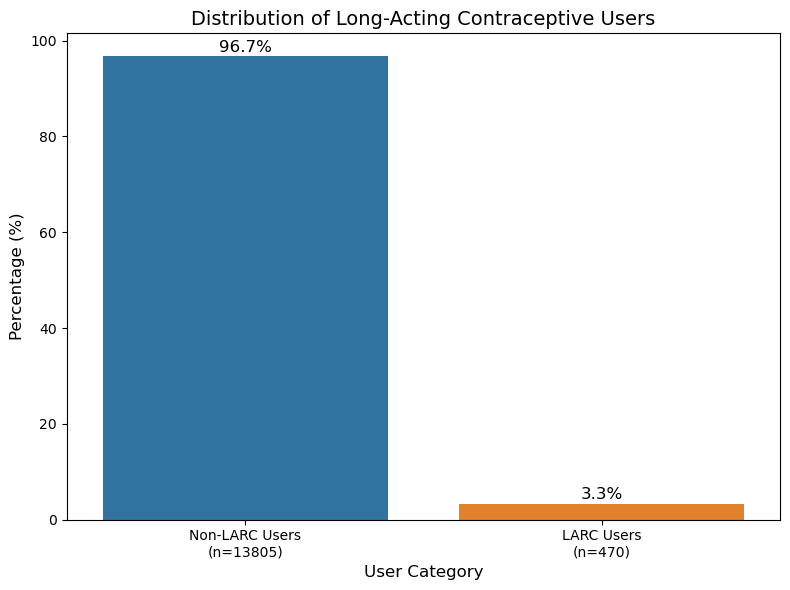

Class Distribution:
long_acting_user
0    13805
1      470
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = df['long_acting_user'].value_counts(normalize=True) * 100
counts = df['long_acting_user'].value_counts()

# Create figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_distribution.index, 
                 y=class_distribution.values,
                 palette=['#1f77b4', '#ff7f0e'])

# Customize plot
plt.title('Distribution of Long-Acting Contraceptive Users', fontsize=14)
plt.xlabel('User Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1], 
           labels=[f'Non-LARC Users\n(n={counts[0]})', 
                   f'LARC Users\n(n={counts[1]})'])

# Add percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1,
            f'{class_distribution.values[i]:.1f}%',
            ha='center', fontsize=12)

plt.tight_layout()

# Save and show
plt.savefig(r"C:\Users\HP\Desktop\edited\larc_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Print raw counts
print("Class Distribution:")
print(counts)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14275 entries, 0 to 14274
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ur                         12232 non-null  object 
 1   age                        14177 non-null  float64
 2   marital_status             12361 non-null  object 
 3   religion                   13202 non-null  object 
 4   num_HH_members             14274 non-null  object 
 5   radio                      14272 non-null  object 
 6   tv                         14272 non-null  object 
 7   school                     14197 non-null  object 
 8   pregnant                   14266 non-null  object 
 9   heard_implants             14275 non-null  object 
 10  heard_IUD                  14275 non-null  object 
 11  current_method             14219 non-null  object 
 12  fp_side_effects            12495 non-null  object 
 13  fp_ever_used               14264 non-null  obj

Before SMOTE class distribution:
long_acting_user
0    70.9%
1    29.1%
Name: proportion, dtype: object

After SMOTE class distribution:
long_acting_user
0    50.0%
1    50.0%
Name: proportion, dtype: object


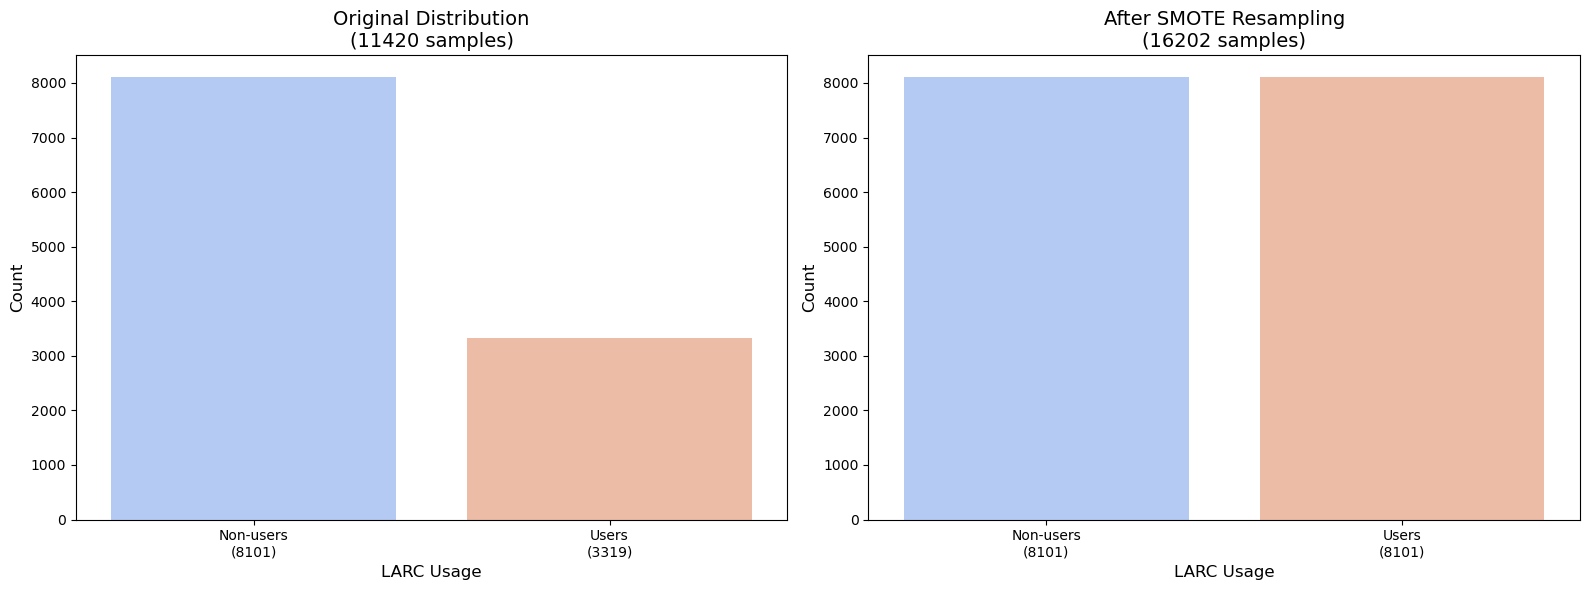

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load data
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

# Clean numerical prefixes and normalize values
def clean_value(x):
    if pd.isna(x):
        return x
    x = str(x).strip().lower()
    if '.' in x:
        return x.split('.')[-1].strip()
    return x

# Apply cleaning to all categorical columns
categorical_cols = [
    'ur', 'marital_status', 'religion', 'visited_a_facility',
    'fp_side_effects', 'current_method', 'heard_implants', 'heard_IUD',
    'fp_ever_used', 'pregnant', 'radio', 'tv', 'school', 
    'visited_by_health_worker', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
]

for col in categorical_cols:
    df[col] = df[col].apply(clean_value)

# Enhanced binary conversion with multiple patterns
binary_conversion = {
    'yes': 1, 'no': 0, '0': 0, '1': 1, 
    'n': 0, 'y': 1, 'non': 0, 'oui': 1,
    '0. no': 0, '1. yes': 1, 'no response': 0, '-99': 0
}

binary_cols = [
    'radio', 'tv', 'school', 'pregnant', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
]

for col in binary_cols:
    df[col] = (
        df[col].str.strip().str.lower()
        .map(binary_conversion))
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Handle special cases in categorical features
def handle_special_cases(df):
    # Clean pregnancy status
    df['pregnant'] = df['pregnant'].replace({
        'unsure': 0, '-88': 0, 'not sure': 0
    }).fillna(0)
    
    # Clean marital status
    df['marital_status'] = df['marital_status'].replace({
        'living with a partner': 'cohabiting',
        'currently_living_with_partner': 'cohabiting',
        'never married': 'single',
        'widow / widower': 'widowed'
    })
    
    # Clean religion
    df['religion'] = df['religion'].replace({
        'evangelica': 'evangelical',
        'animast': 'traditional',
        'chrétienne': 'christian',
        '-77': 'no religion'
    })
    
    # Clean current method (create binary indicators)
    larc_methods = ['iud', 'implants']
    df['current_method'] = df['current_method'].fillna('none')
    df['multiple_methods'] = df['current_method'].str.contains(' ').astype(int)
    
    for method in larc_methods:
        df[f'method_{method}'] = df['current_method'].str.contains(method).astype(int)
    
    return df

df = handle_special_cases(df)

# Create final target variable
df['long_acting_user'] = df[['method_iud', 'method_implants']].max(axis=1)

# Feature engineering
numeric_features = [
    'age', 'num_HH_members', 'age_at_first_sex',
    'age_at_first_use', 'age_at_first_use_children'
]

categorical_features = [
    'ur', 'marital_status', 'religion'
]

# Convert numeric features
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Final preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(
            handle_unknown='infrequent_if_exist',
            min_frequency=0.01
        ), categorical_features)
    ],
    remainder='drop'
)

# Build SMOTE pipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5))
])

# Split and process data
X = df.drop('long_acting_user', axis=1)
y = df['long_acting_user']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Process data through pipeline
print("Before SMOTE class distribution:")
print(y_train.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train_res).value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

# Visualization
plt.figure(figsize=(16, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='coolwarm')
plt.title(f'Original Distribution\n({len(y_train)} samples)', fontsize=14)
plt.xlabel('LARC Usage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], [f'Non-users\n({sum(y_train==0)})', f'Users\n({sum(y_train==1)})'])

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res, palette='coolwarm')
plt.title(f'After SMOTE Resampling\n({len(y_train_res)} samples)', fontsize=14)
plt.xlabel('LARC Usage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], [f'Non-users\n({sum(y_train_res==0)})', f'Users\n({sum(y_train_res==1)})'])

plt.tight_layout()
plt.savefig(r"C:\Users\HP\Desktop\edited\final_smote_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
df = df.dropna(subset=['long_acting_user'] + [
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
])

# Initialize models with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

# Create preprocessing and modeling pipeline
def create_pipeline(model):
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

# Store results
results = []
roc_curves = []
pr_curves = []

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    auc_roc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'AUC-ROC': auc_roc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Store curves
    roc_curves.append(RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name))
    pr_curves.append(PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name=name))

# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Model').sort_values('AUC-ROC', ascending=False)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for curve in roc_curves:
    curve.plot(ax=plt.gca())
plt.title('ROC Curves Comparison')
plt.savefig(r"C:\Users\HP\Desktop\edited\roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for curve in pr_curves:
    curve.plot(ax=plt.gca())
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc='upper right')
plt.savefig(r"C:\Users\HP\Desktop\edited\pr_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# Print formatted results table
print("\nModel Performance Summary:")
print(results_df.round(3).to_markdown())


Training Logistic Regression...


ValueError: could not convert string to float: 'Yes'


Training Logistic Regression...

Training Random Forest...

Training XGBoost...


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 4702, number of negative: 4702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3253
[LightGBM] [Info] Number of data points in the train set: 9404, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM...

Training Naïve Bayes...

Training KNN...

Training MLP...

Training AdaBoost...


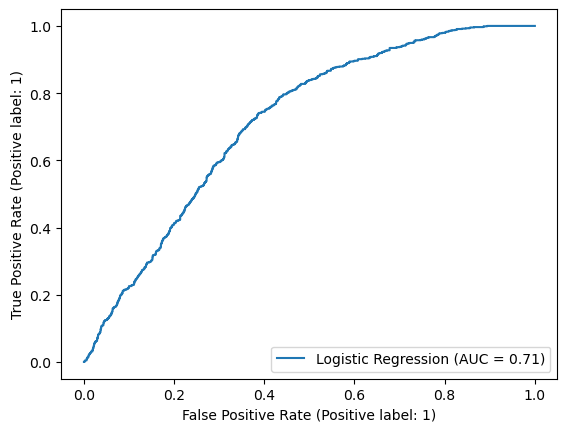

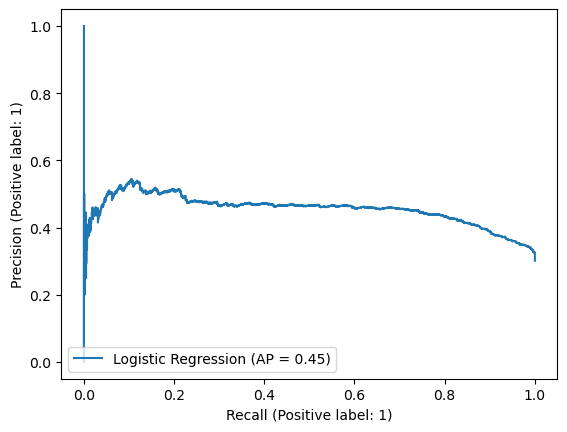

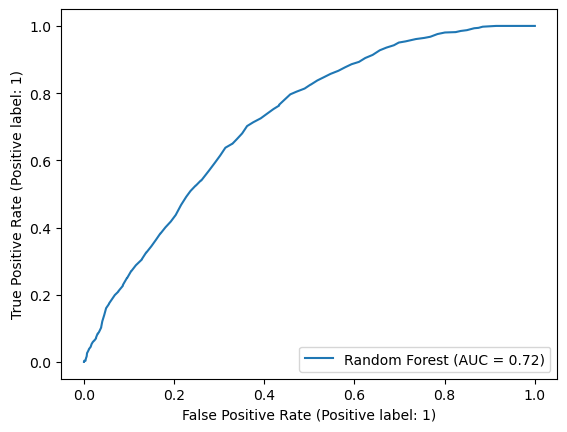

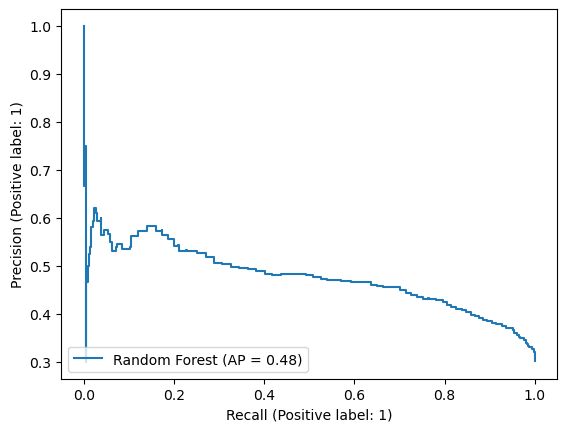

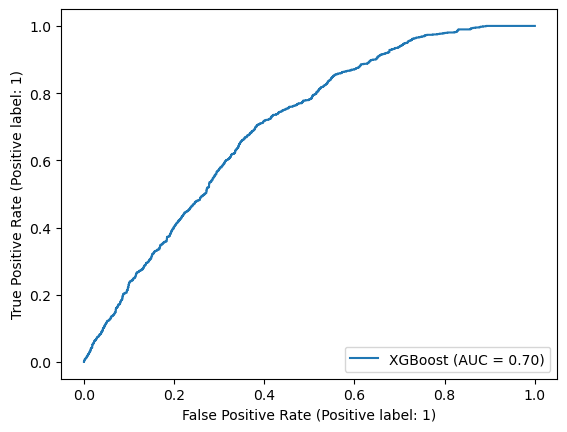

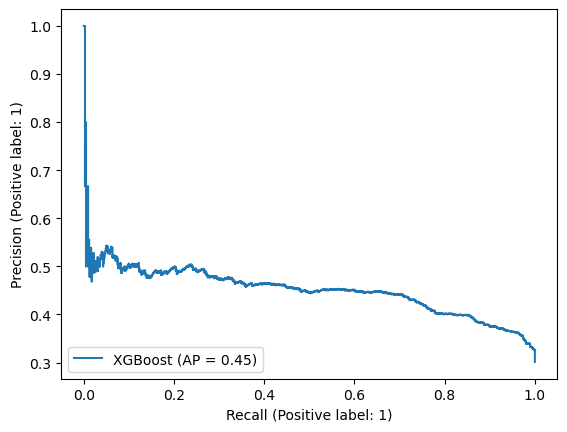

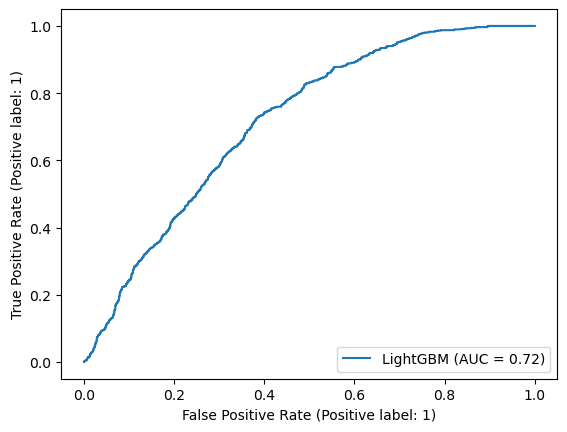

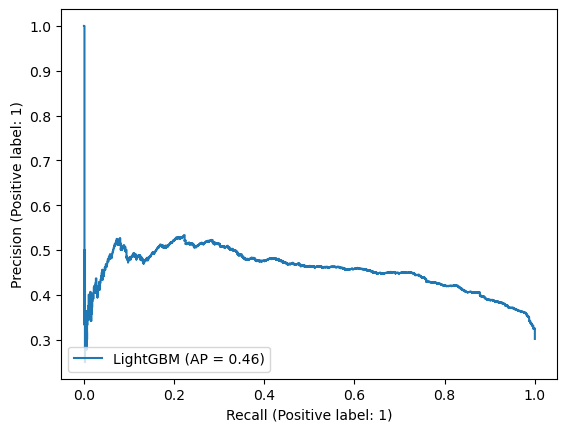

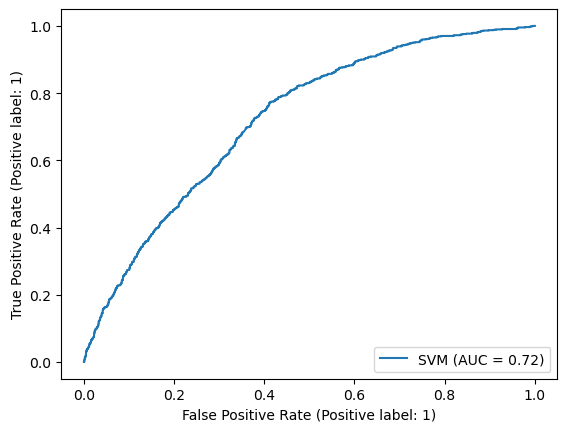

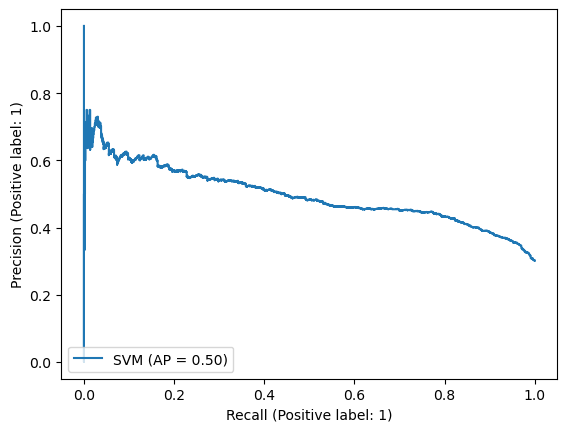

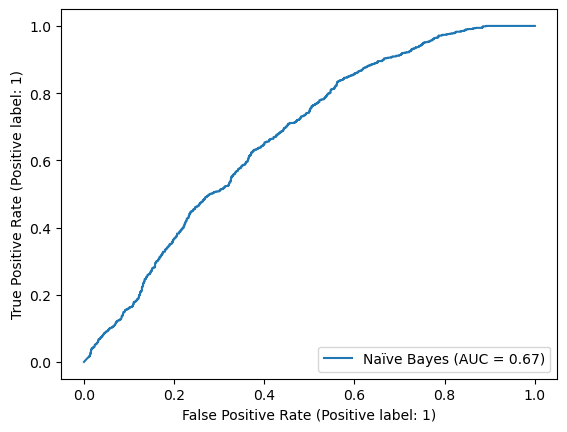

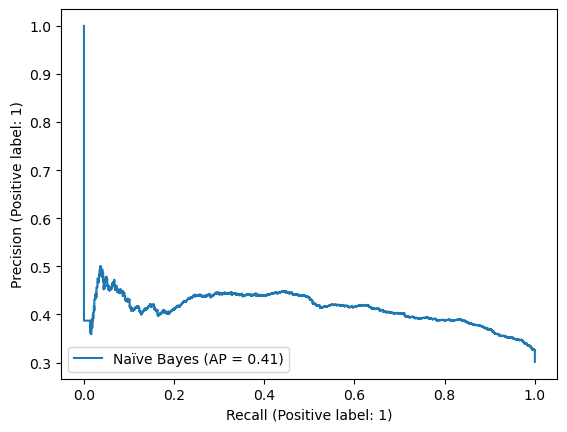

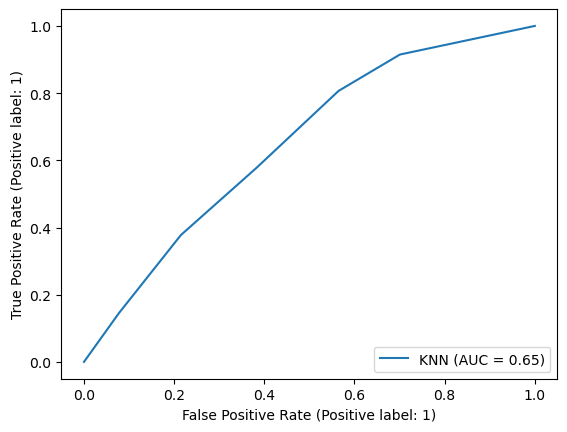

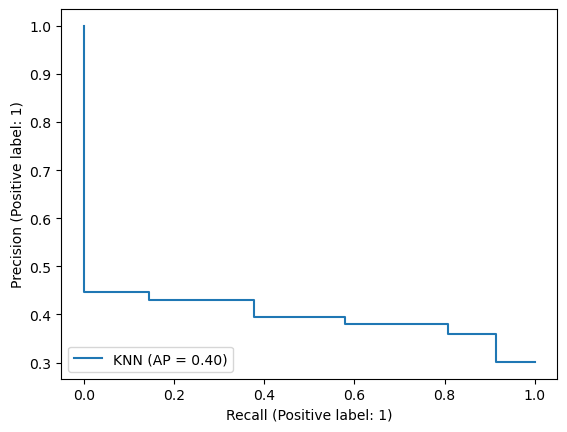

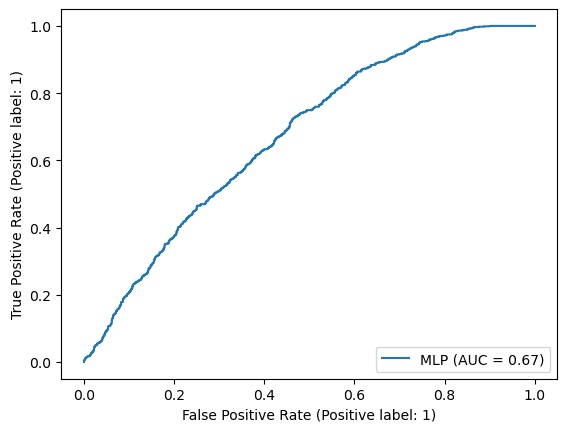

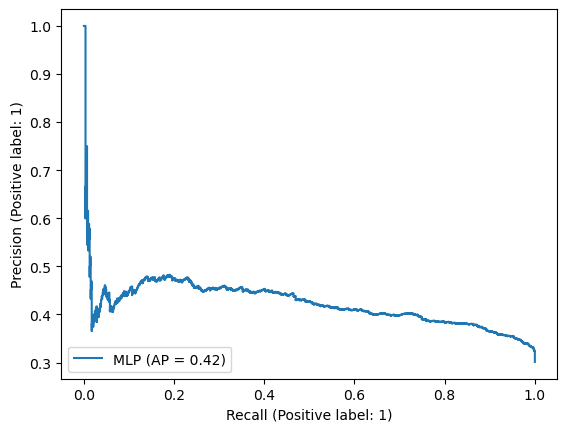

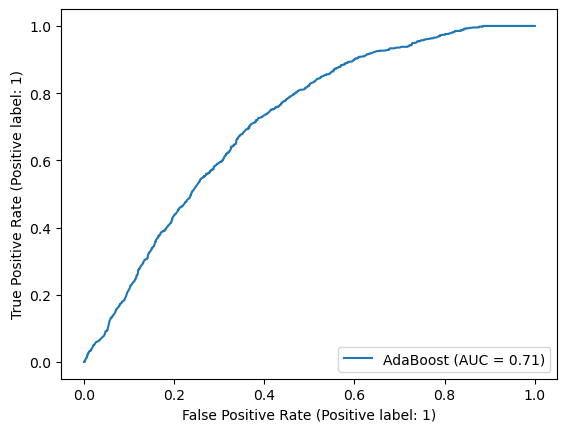

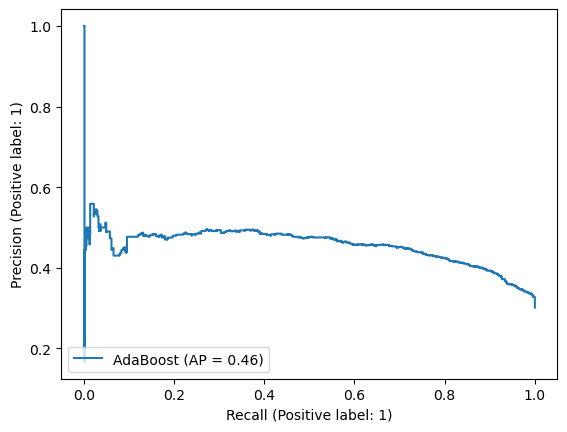

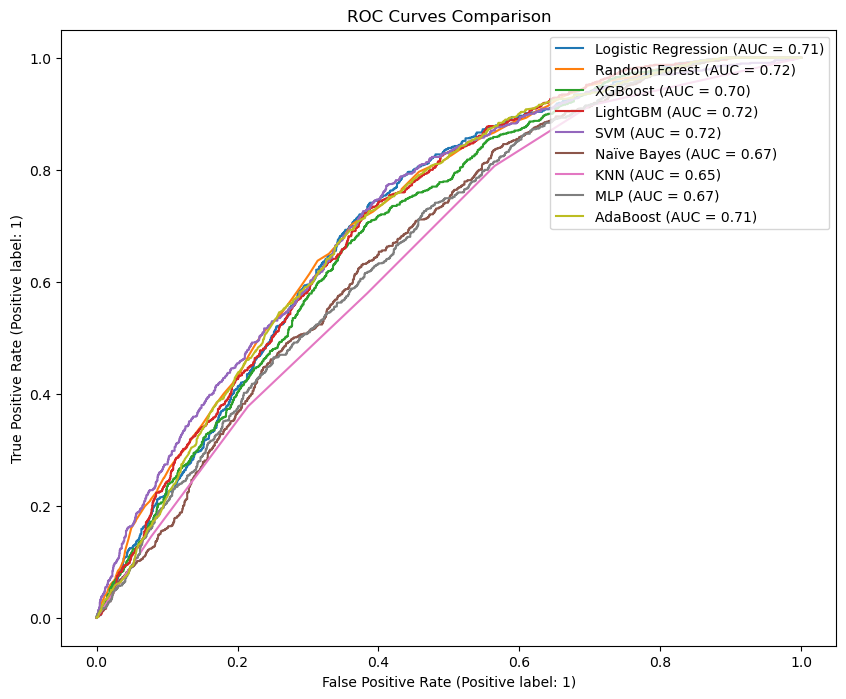

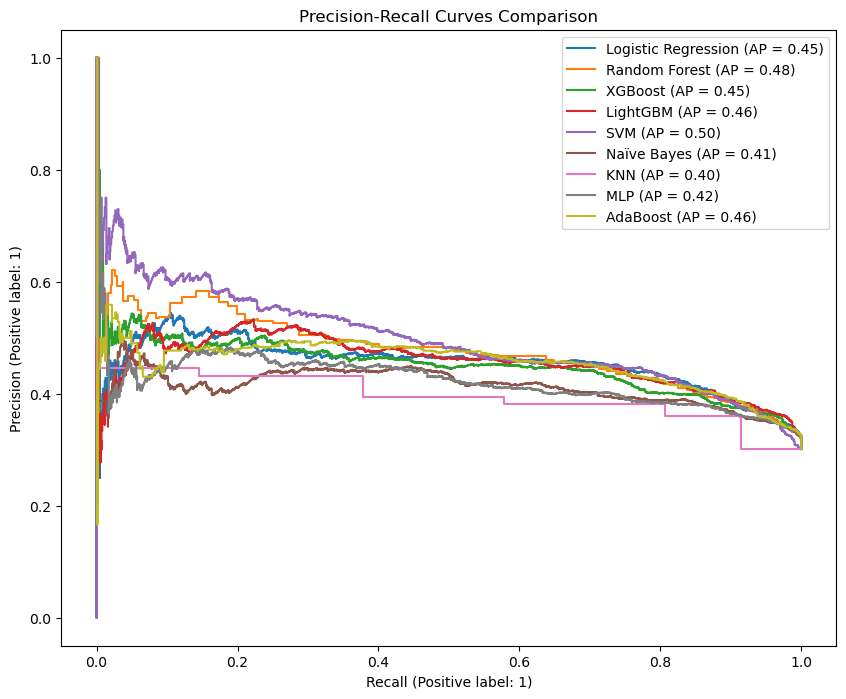


Model Performance Summary:
| Model               |   AUC-ROC |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|----------:|-----------:|------------:|---------:|-----------:|
| SVM                 |     0.723 |      0.65  |       0.45  |    0.727 |      0.556 |
| Random Forest       |     0.721 |      0.688 |       0.481 |    0.437 |      0.458 |
| LightGBM            |     0.716 |      0.688 |       0.478 |    0.381 |      0.424 |
| Logistic Regression |     0.714 |      0.655 |       0.454 |    0.713 |      0.555 |
| AdaBoost            |     0.714 |      0.671 |       0.463 |    0.573 |      0.512 |
| XGBoost             |     0.701 |      0.679 |       0.46  |    0.373 |      0.412 |
| MLP                 |     0.673 |      0.663 |       0.443 |    0.463 |      0.453 |
| Naïve Bayes         |     0.671 |      0.381 |       0.327 |    0.997 |      0.492 |
| KNN                 |     0.651 |      0.605 |       0.394 |    0.579 |      0.469 |


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
import xgboost as xgb
import lightgbm as lgb

# Load your dataset (replace with actual data loading)
# df = pd.read_csv('your_data.csv')

# Keep only rows with non-missing target variable
df = df.dropna(subset=['long_acting_user'])

# Define features and target
y = df['long_acting_user']
X = df[[
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define column types
numerical_columns = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_columns = ['ur', 'marital_status', 'religion', 'radio',
                      'tv', 'heard_implants', 'heard_IUD', 'fp_side_effects',
                      'fp_ever_used', 'visited_by_health_worker',
                      'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv',
                      'fp_ad_magazine']

# Create preprocessing steps
preprocessor = ColumnTransformer([
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_columns),
    ('num', 'passthrough', numerical_columns)
])

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

# Create complete pipeline
def create_pipeline(model):
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('knn_imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

# Store results
results = []
roc_curves = []
pr_curves = []

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results.append({
        'Model': name,
        'AUC-ROC': roc_auc_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })
    
    # Store curves
    roc_curves.append(RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name))
    pr_curves.append(PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name=name))

# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Model').sort_values('AUC-ROC', ascending=False)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for curve in roc_curves:
    curve.plot(ax=plt.gca())
plt.title('ROC Curves Comparison')
plt.legend(loc='upper right')
plt.savefig(r"C:\Users\HP\Desktop\edited\roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for curve in pr_curves:
    curve.plot(ax=plt.gca())
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc='upper right')
plt.savefig(r"C:\Users\HP\Desktop\edited\pr_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# Print results
print("\nModel Performance Summary:")
print(results_df.round(3).to_markdown())


Training Logistic Regression...

Training Random Forest...

Training XGBoost...


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 9663, number of negative: 9663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7859
[LightGBM] [Info] Number of data points in the train set: 19326, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM...


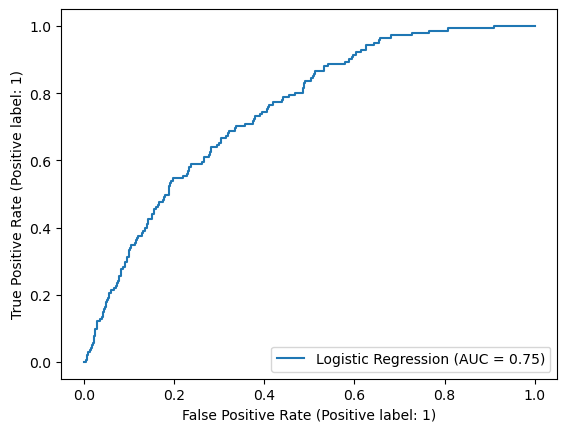

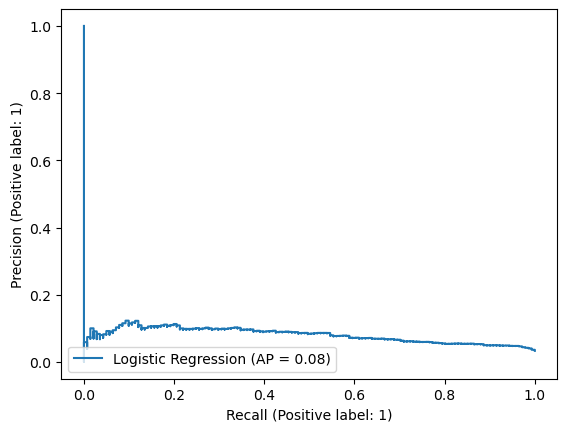

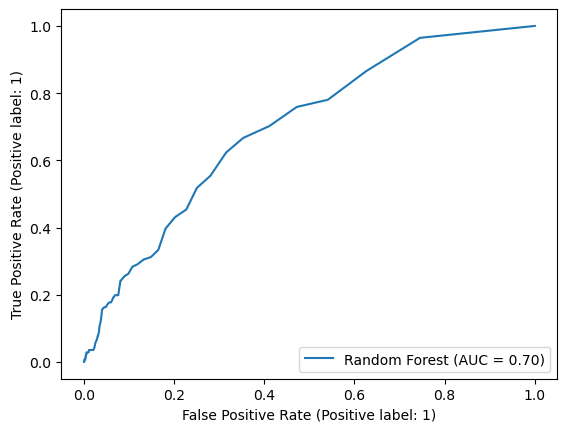

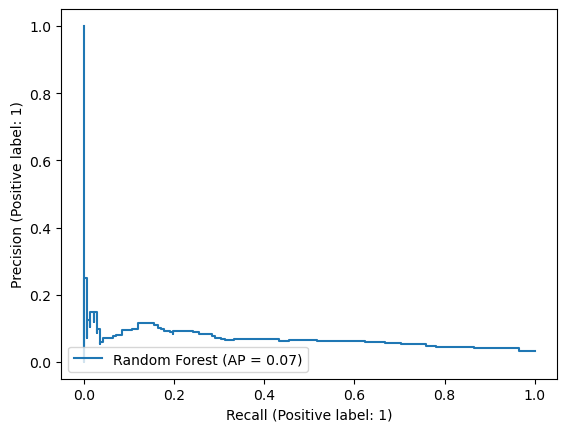

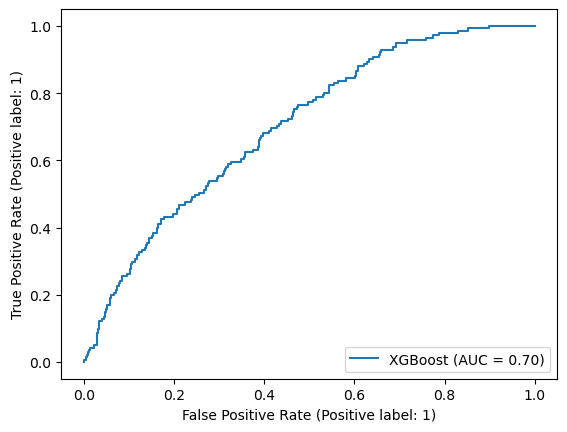

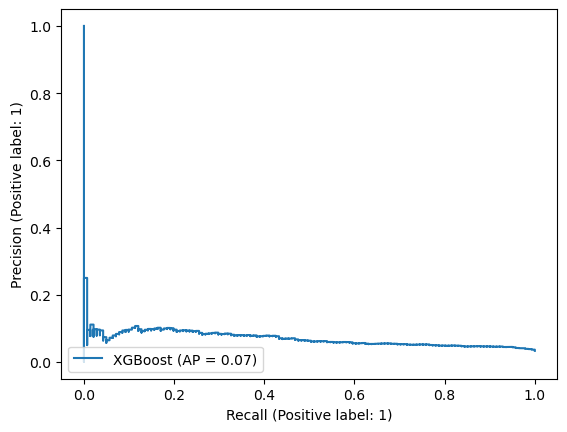

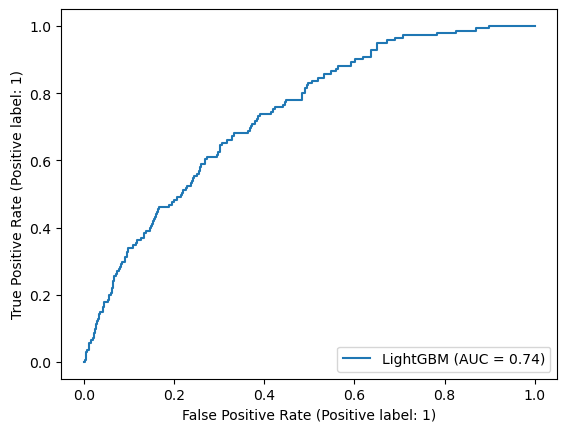

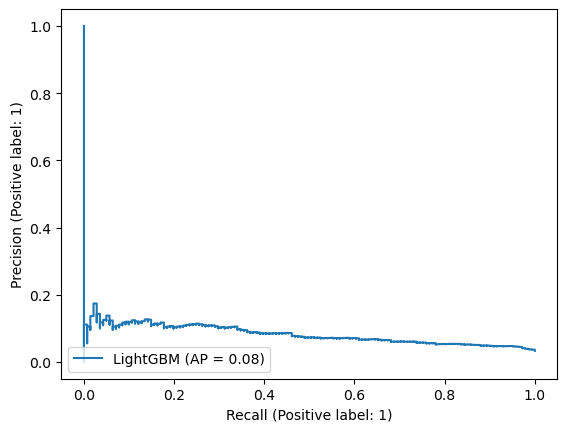

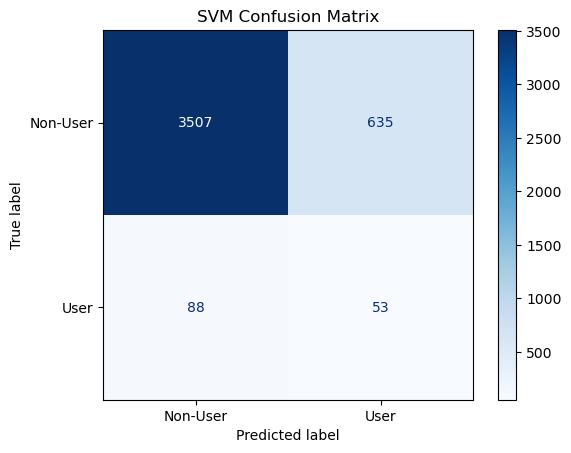


Training Naïve Bayes...

Training KNN...

Training MLP...

Training AdaBoost...


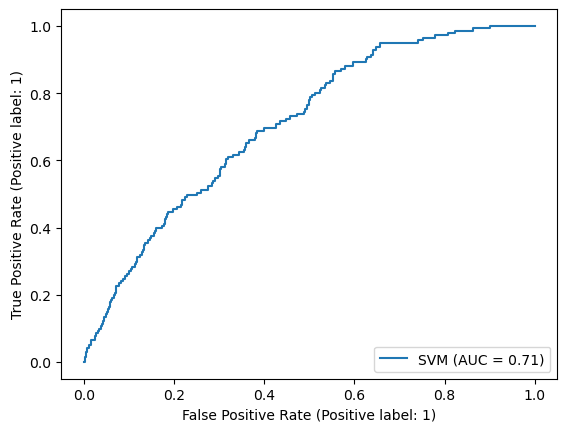

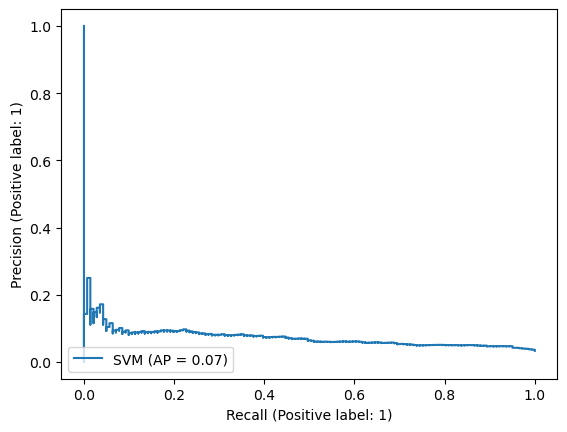

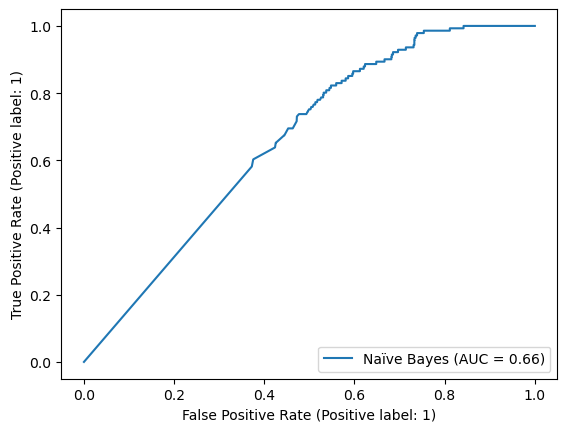

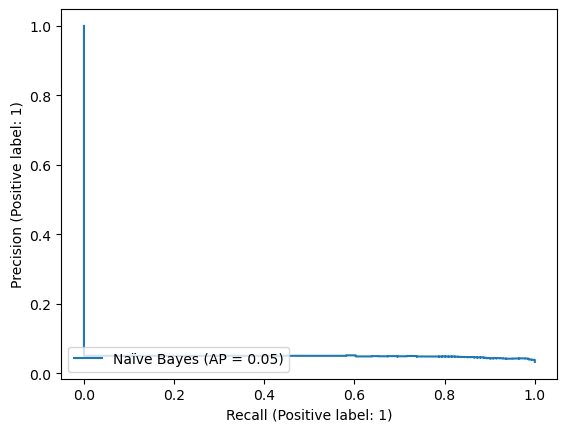

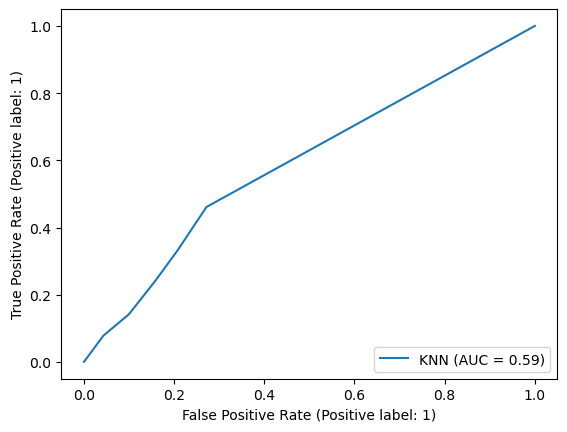

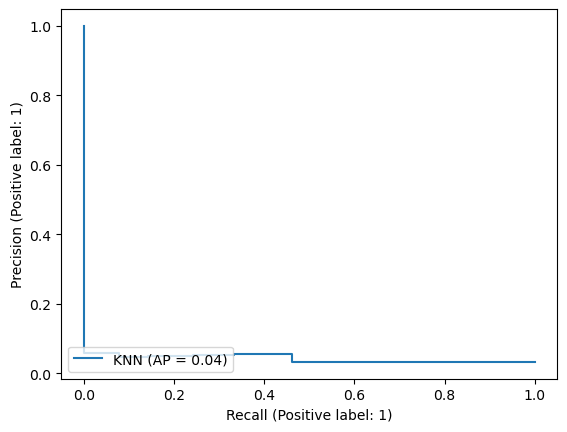

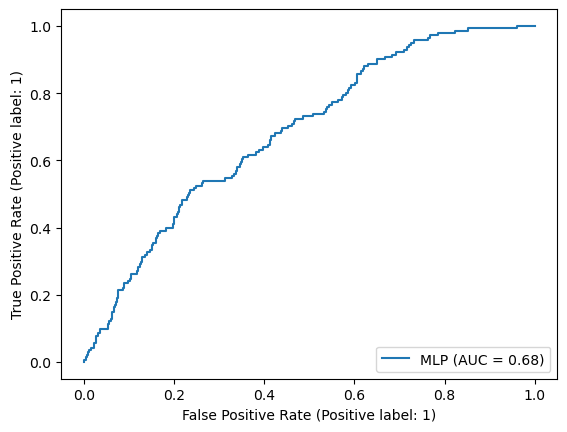

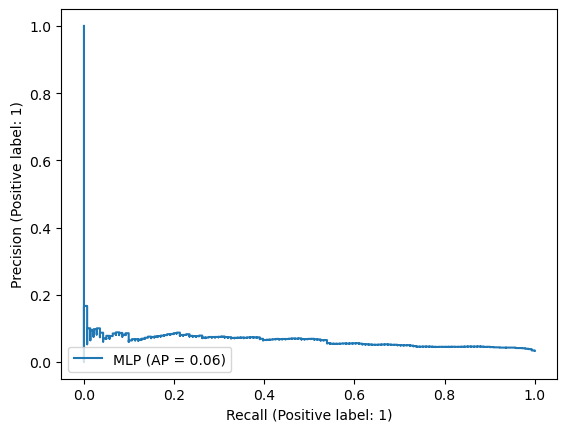

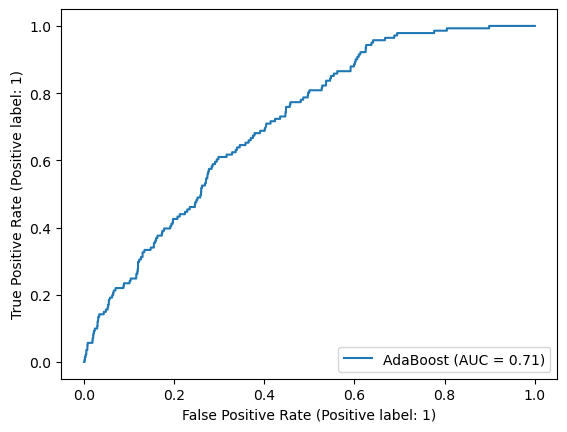

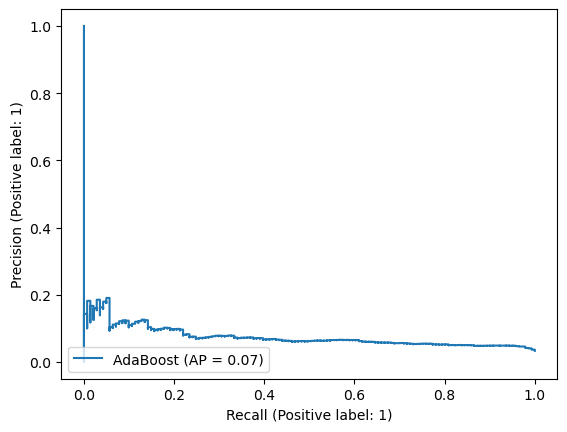

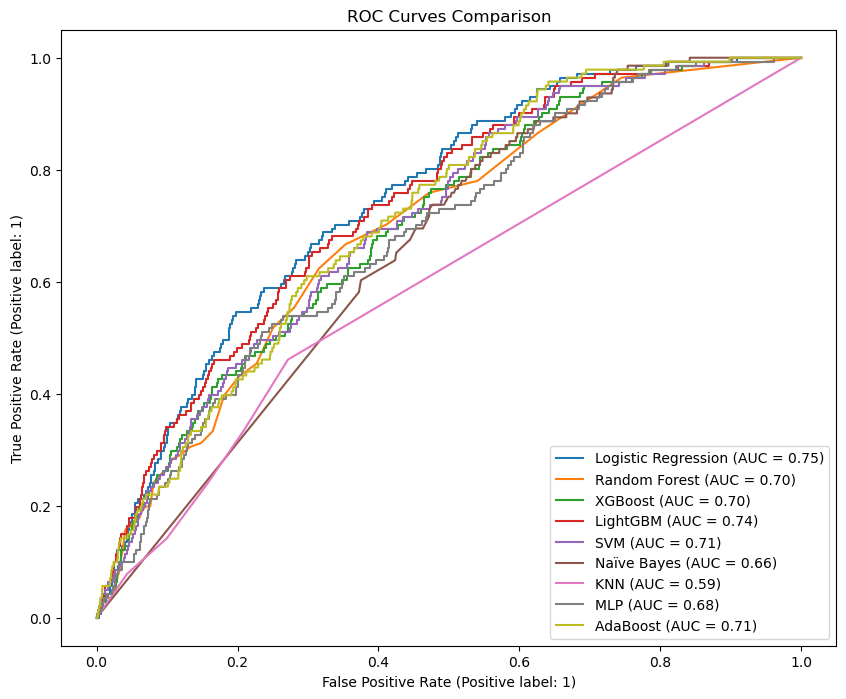

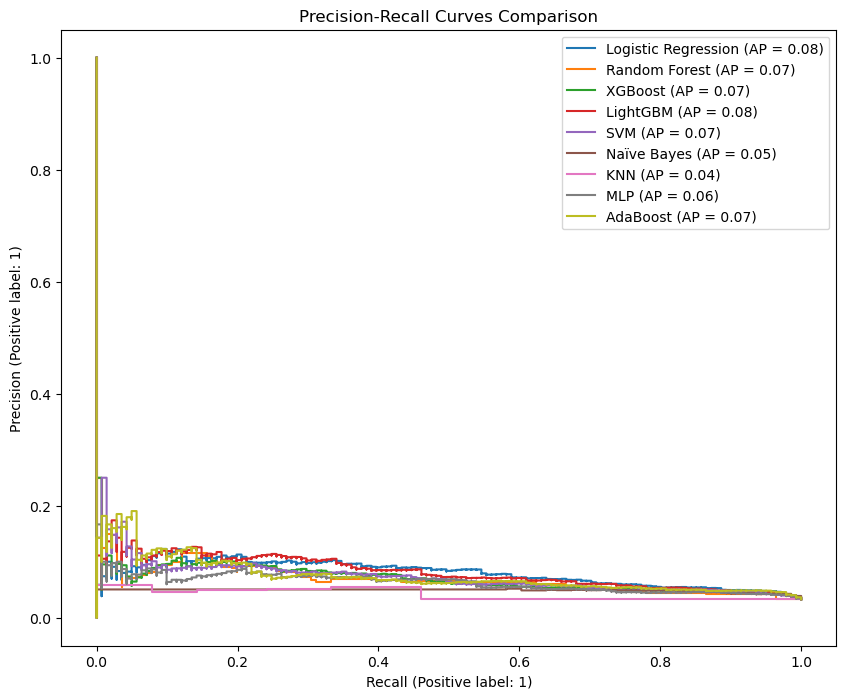


Model Performance Summary:
| Model               |   AUC-ROC |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|----------:|-----------:|------------:|---------:|-----------:|
| Logistic Regression |     0.748 |      0.622 |       0.061 |    0.73  |      0.113 |
| LightGBM            |     0.736 |      0.965 |       0     |    0     |      0     |
| AdaBoost            |     0.715 |      0.844 |       0.076 |    0.333 |      0.124 |
| SVM                 |     0.708 |      0.831 |       0.077 |    0.376 |      0.128 |
| XGBoost             |     0.702 |      0.964 |       0.071 |    0.007 |      0.013 |
| Random Forest       |     0.699 |      0.962 |       0.138 |    0.028 |      0.047 |
| MLP                 |     0.685 |      0.923 |       0.065 |    0.099 |      0.079 |
| Naïve Bayes         |     0.66  |      0.398 |       0.046 |    0.872 |      0.087 |
| KNN                 |     0.591 |      0.822 |       0.049 |    0.241 |      0.082 |


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, RocCurveDisplay, 
                             PrecisionRecallDisplay, confusion_matrix, 
                             ConfusionMatrixDisplay)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

# Convert numerical columns to numeric type (critical fix)
numerical_columns = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Preprocessing
df = df.dropna(subset=['long_acting_user'])
y = df['long_acting_user']
X = df[[
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define column types
categorical_columns = ['ur', 'marital_status', 'religion', 'radio',
                      'tv', 'heard_implants', 'heard_IUD', 'fp_side_effects',
                      'fp_ever_used', 'visited_by_health_worker',
                      'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv',
                      'fp_ad_magazine']

# Create preprocessing steps
preprocessor = ColumnTransformer([
    ('cat', ImbPipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_columns),
    ('num', ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_columns)
])

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

# Create complete pipeline
def create_pipeline(model):
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

# Train and evaluate models
results = []
roc_curves = []
pr_curves = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        pipeline = create_pipeline(model)
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Metrics
        metrics = {
            'Model': name,
            'AUC-ROC': roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }
        results.append(metrics)
        
        # SVM-specific confusion matrix
        if name == "SVM":
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['Non-User', 'User'])
            disp.plot(cmap='Blues', values_format='d')
            plt.title('SVM Confusion Matrix')
            plt.savefig(r"C:\Users\HP\Desktop\PMA\svm_confusion_matrix.png", dpi=300)
            plt.show()

        # Store curves
        if y_proba is not None:
            roc_curves.append(RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name))
            pr_curves.append(PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name=name))
    
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        continue

# Results dataframe
results_df = pd.DataFrame(results).set_index('Model').sort_values('AUC-ROC', ascending=False)

# Plot curves
plt.figure(figsize=(10, 8))
for curve in roc_curves:
    curve.plot(ax=plt.gca())
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.savefig(r"C:\Users\HP\Desktop\PMA\roc_curves.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
for curve in pr_curves:
    curve.plot(ax=plt.gca())
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc='upper right')
plt.savefig(r"C:\Users\HP\Desktop\PMA\pr_curves.png", dpi=300)
plt.show()

# Print results
print("\nModel Performance Summary:")
print(results_df.round(3).to_markdown())


Training Logistic Regression...

Training Random Forest...

Training XGBoost...


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 9663, number of negative: 9663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7859
[LightGBM] [Info] Number of data points in the train set: 19326, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM...


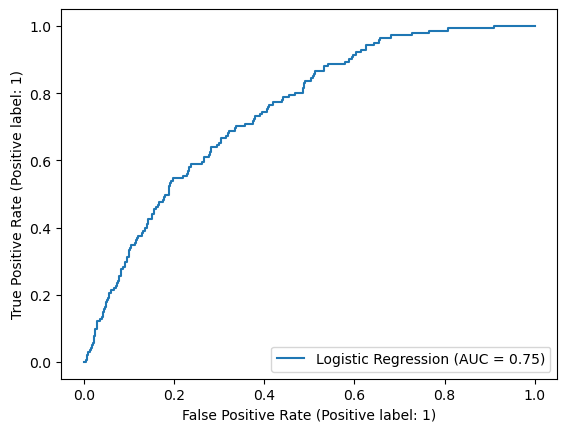

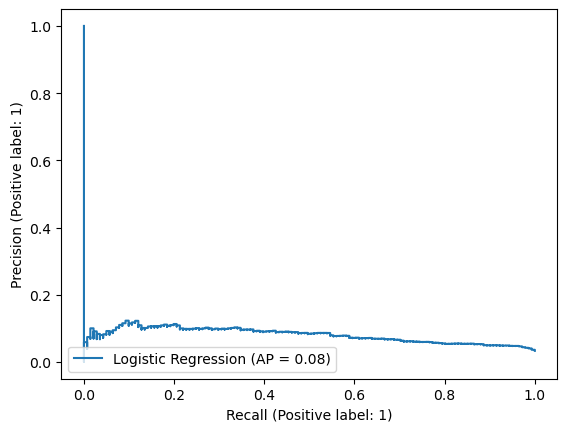

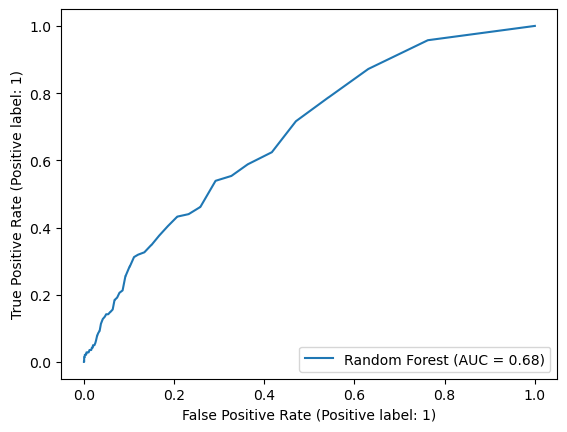

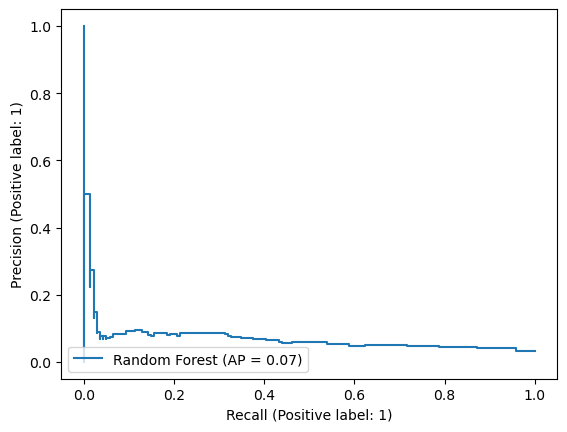

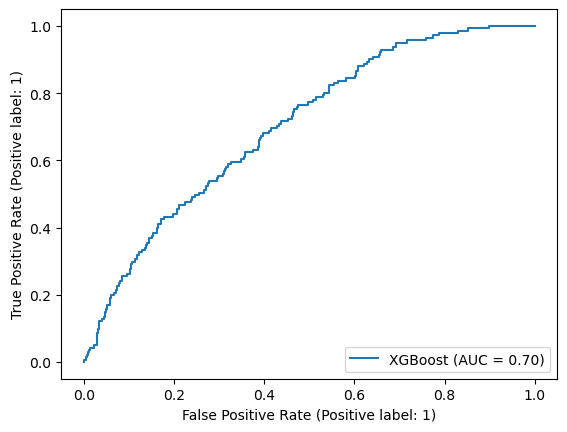

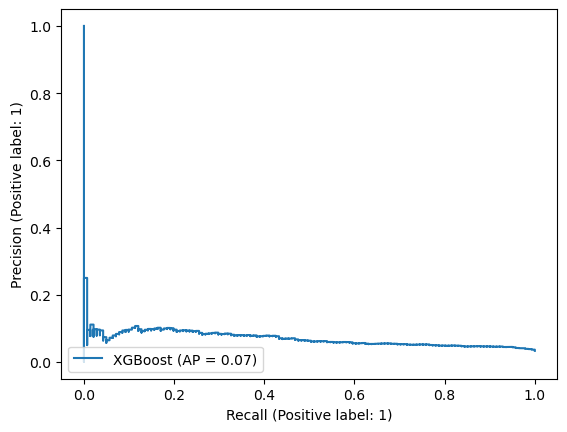

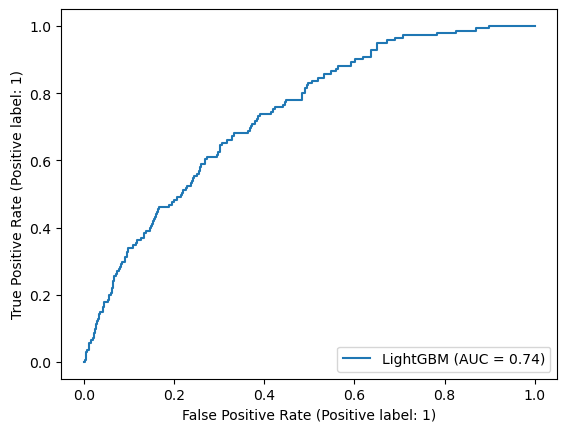

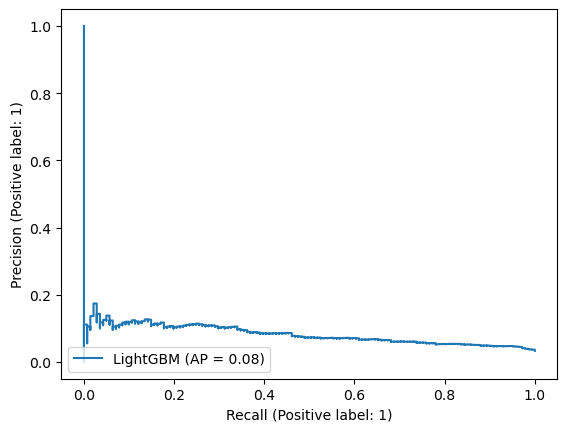

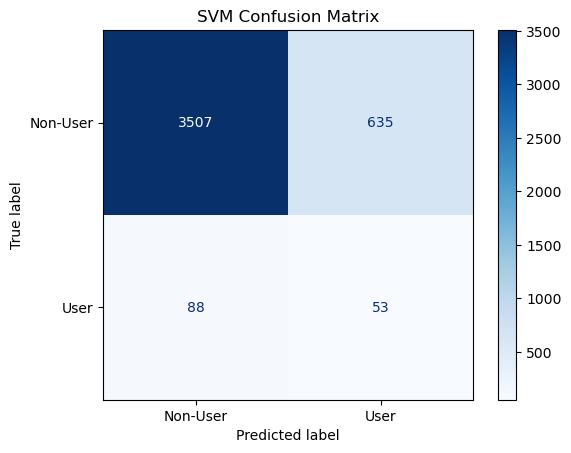


Training Naïve Bayes...

Training KNN...

Training MLP...

Training AdaBoost...


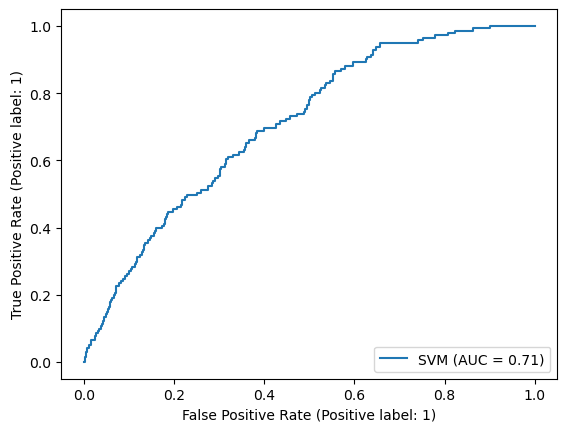

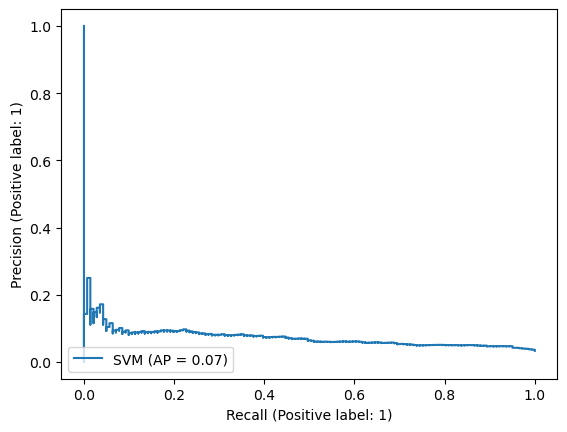

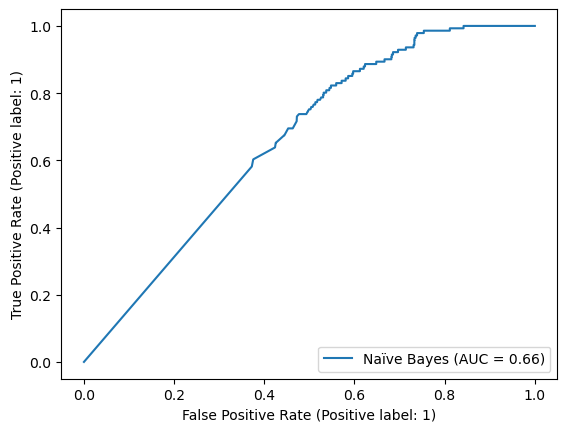

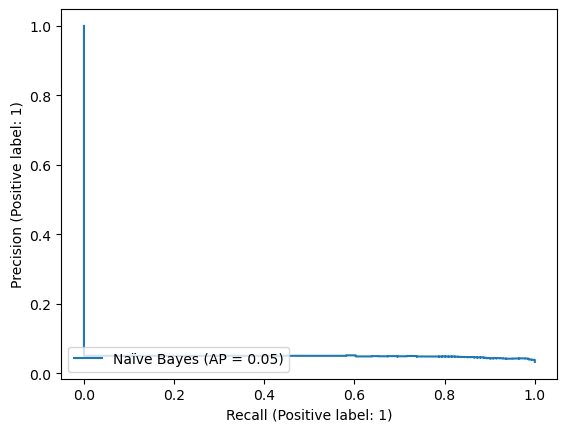

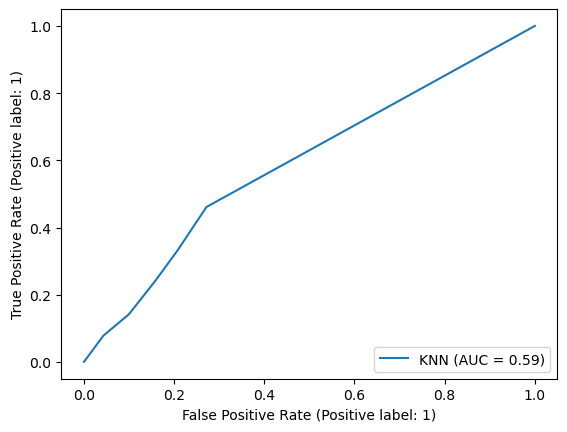

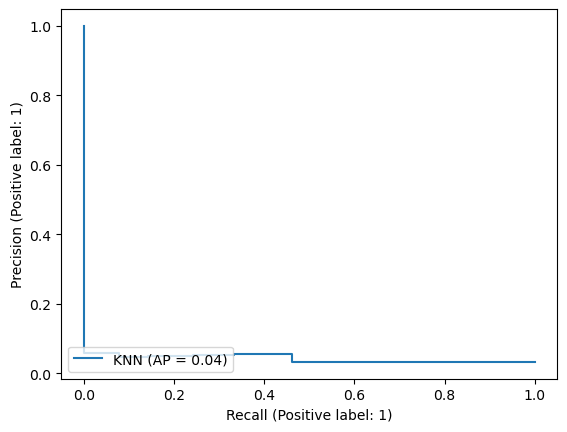

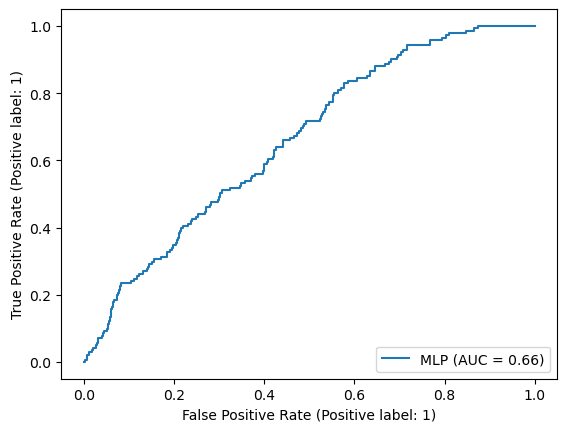

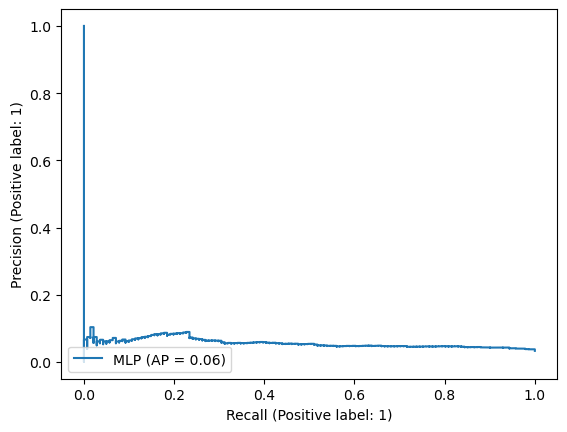

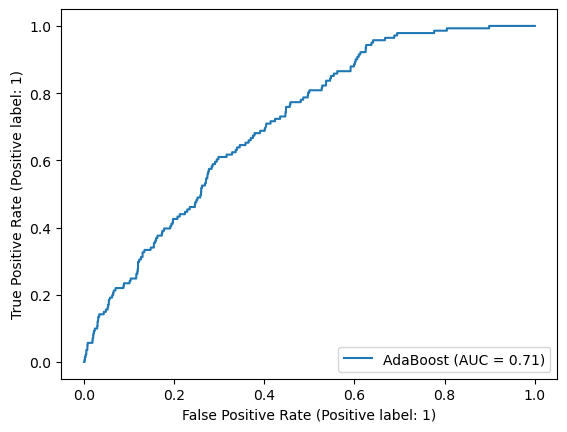

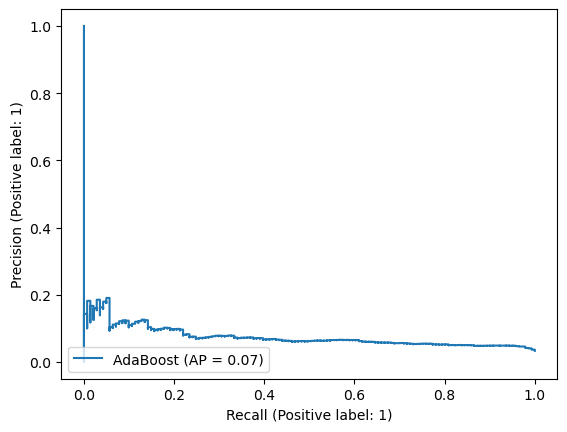

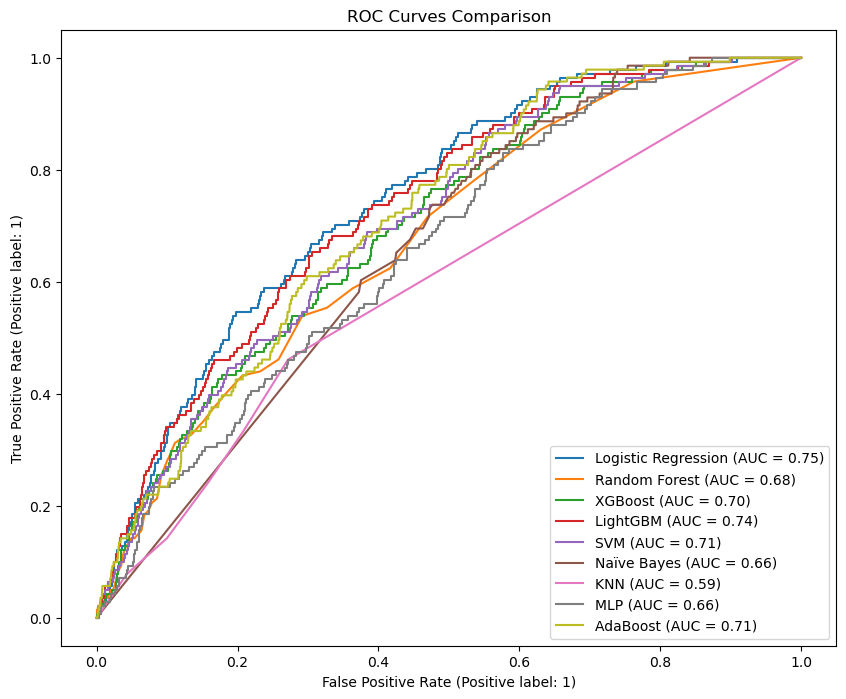

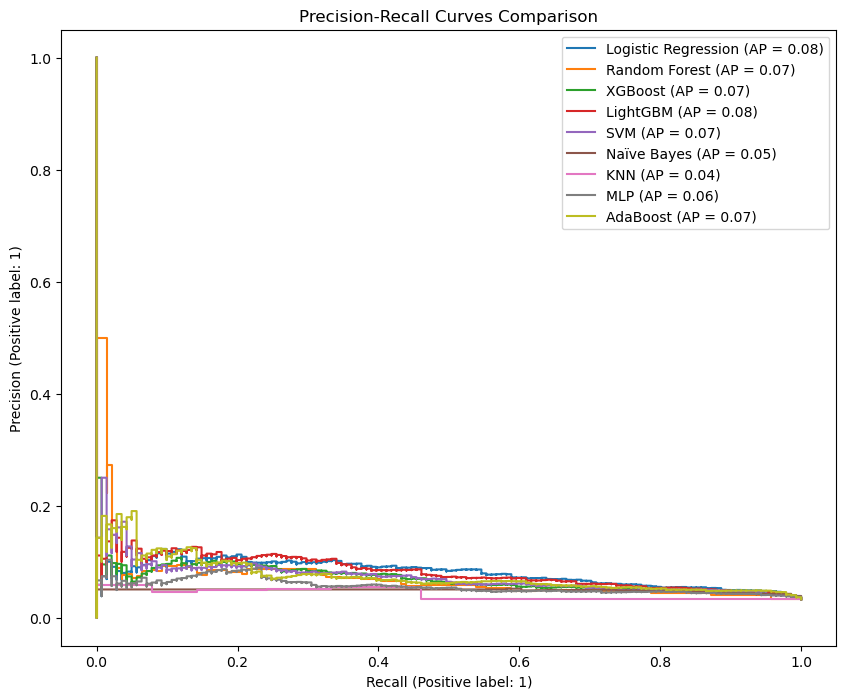


DeLong's Test Results (AUC-ROC comparisons):
Error comparing Logistic Regression vs Random Forest: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs XGBoost: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs LightGBM: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs SVM: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs Naïve Bayes: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs KNN: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs MLP: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Logistic Regression vs AdaBoost: shapes (141,) and (4142,) not aligned: 141 (dim 0) != 4142 (dim 0)
Error comparing Random Forest vs X

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, RocCurveDisplay, 
                             PrecisionRecallDisplay, confusion_matrix, 
                             ConfusionMatrixDisplay)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import norm

# DeLong's test implementation (corrected)
def compute_midrank(x):
    J = np.argsort(x)
    Z = x[J]
    N = len(Z)
    T = np.zeros(N, dtype=np.float64)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=np.float64)
    T2[J] = T + 1
    return T2

def delong_roc_variance(ground_truth, predictions):
    order = (-predictions).argsort()
    label_1_count = np.sum(ground_truth)
    label_0_count = len(ground_truth) - label_1_count

    if label_1_count == 0 or label_0_count == 0:
        raise ValueError("Need at least one positive and one negative sample")

    ranked = compute_midrank(predictions[order])
    pos_rank_sum = np.sum(ranked[:label_1_count])
    auc = (pos_rank_sum - (label_1_count*(label_1_count+1)/2)) / (label_1_count*label_0_count)
    
    pos_sorted = np.sort(predictions[ground_truth == 1])
    neg_sorted = np.sort(predictions[ground_truth == 0])

    return auc, pos_sorted, neg_sorted

def delong_test(y_true, pred1, pred2):
    auc1, pos1, neg1 = delong_roc_variance(y_true, pred1)
    auc2, pos2, neg2 = delong_roc_variance(y_true, pred2)
    
    n_pos = len(pos1)
    n_neg = len(neg1)
    
    tmp = np.concatenate([pos1, neg1])
    L = np.sum(tmp[:, np.newaxis] < tmp[np.newaxis, :], axis=1) / float(n_neg * n_pos)
    var_auc1 = (L[:n_pos].sum() - auc1**2) / (n_pos - 1)
    
    tmp = np.concatenate([pos2, neg2])
    L = np.sum(tmp[:, np.newaxis] < tmp[np.newaxis, :], axis=1) / float(n_neg * n_pos)
    var_auc2 = (L[:n_pos].sum() - auc2**2) / (n_pos - 1)
    
    # Corrected line with proper parenthesis
    cov = (L[:n_pos].dot(L[n_pos:]) / (n_pos * n_neg)) - auc1 * auc2
    
    z = (auc1 - auc2) / np.sqrt(var_auc1 + var_auc2 - 2*cov)
    p = 2 * norm.sf(abs(z))
    
    return z, p

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

# Convert numerical columns to numeric type
numerical_columns = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Preprocessing
df = df.dropna(subset=['long_acting_user'])
y = df['long_acting_user']
X = df[[
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define column types
categorical_columns = ['ur', 'marital_status', 'religion', 'radio',
                      'tv', 'heard_implants', 'heard_IUD', 'fp_side_effects',
                      'fp_ever_used', 'visited_by_health_worker',
                      'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv',
                      'fp_ad_magazine']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', ImbPipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_columns),
    ('num', ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_columns)
])

# Models setup
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

def create_pipeline(model):
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

# Training and evaluation
results = []
roc_curves = []
pr_curves = []
model_probas = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    try:
        pipeline = create_pipeline(model)
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Store probabilities for DeLong test
        if y_proba is not None:
            model_probas[name] = y_proba
        
        # Metrics
        metrics = {
            'Model': name,
            'AUC-ROC': roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }
        results.append(metrics)
        
        # SVM-specific confusion matrix
        if name == "SVM":
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['Non-User', 'User'])
            disp.plot(cmap='Blues', values_format='d')
            plt.title('SVM Confusion Matrix')
            plt.savefig(r"C:\Users\HP\Desktop\PMA\svm_confusion_matrix.png", dpi=300)
            plt.show()

        # Store curves
        if y_proba is not None:
            roc_curves.append(RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name))
            pr_curves.append(PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, name=name))
    
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        continue

# Results dataframe
results_df = pd.DataFrame(results).set_index('Model').sort_values('AUC-ROC', ascending=False)

# Plot curves
plt.figure(figsize=(10, 8))
for curve in roc_curves:
    curve.plot(ax=plt.gca())
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.savefig(r"C:\Users\HP\Desktop\PMA\roc_curves.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
for curve in pr_curves:
    curve.plot(ax=plt.gca())
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc='upper right')
plt.savefig(r"C:\Users\HP\Desktop\PMA\pr_curves.png", dpi=300)
plt.show()

# DeLong's test comparisons
print("\nDeLong's Test Results (AUC-ROC comparisons):")
models_list = list(model_probas.keys())
p_value_matrix = pd.DataFrame(index=models_list, columns=models_list, dtype=float)

for i, model1 in enumerate(models_list):
    for j, model2 in enumerate(models_list):
        if i >= j:
            continue
        try:
            _, p_value = delong_test(y_test, model_probas[model1], model_probas[model2])
            p_value_matrix.loc[model1, model2] = p_value
            p_value_matrix.loc[model2, model1] = p_value
        except Exception as e:
            print(f"Error comparing {model1} vs {model2}: {str(e)}")
            continue

np.fill_diagonal(p_value_matrix.values, 1.0)
p_value_matrix = p_value_matrix.astype(float).round(4)

print("\nPairwise p-values matrix:")
print(p_value_matrix.to_markdown())

# Print results
print("\nModel Performance Summary:")
print(results_df.round(3).to_markdown())


Training Logistic Regression
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training Random Forest
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Training XGBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM
Fitting 10 folds for each of 2 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 5373, number of negative: 5373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 10746, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training KNN
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training MLP
Fitting 10 folds for each of 1 candidates, totalling 10 fits

Training AdaBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Model Performance Summary:
   

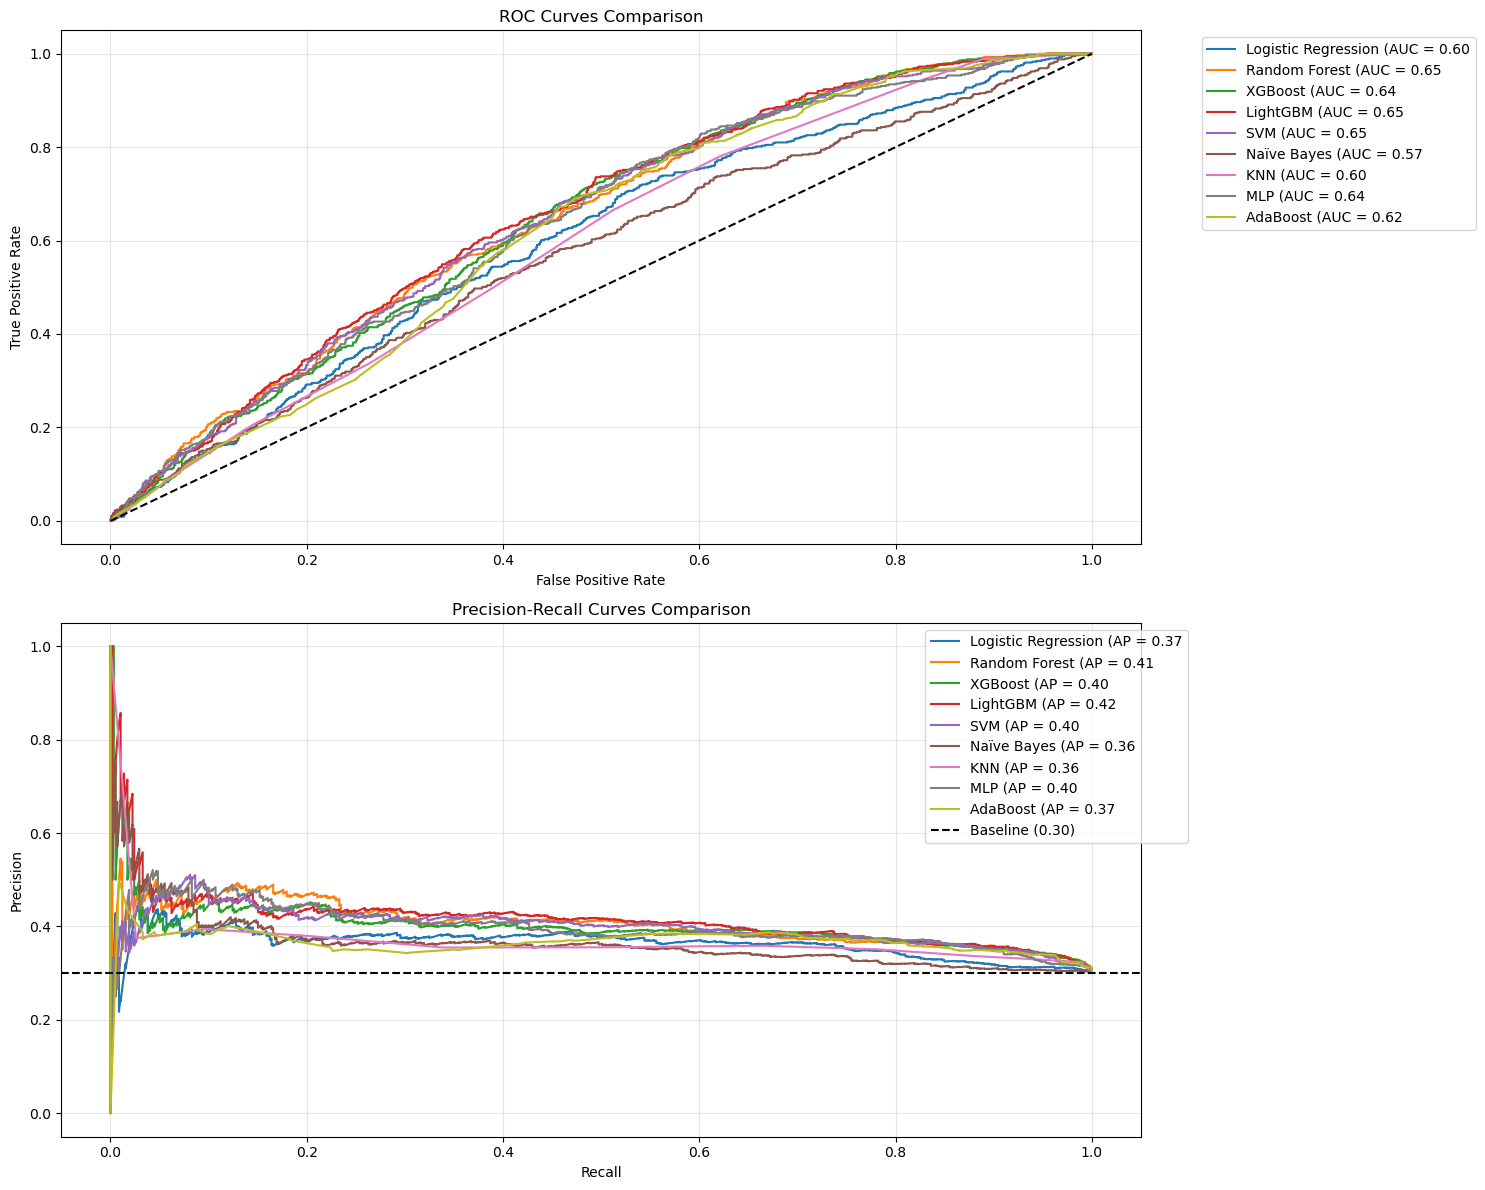

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = df.dropna(subset=['long_acting_user'] + [
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
])

# Load and preprocess data
# ---------------------------------------------------------------
# Assuming df is your cleaned DataFrame with 'long_acting_user' as target
# Make sure to handle missing values and categorical encoding properly

# Example cleaning steps (customize to your data):
# Convert yes/no columns to binary
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']

for col in yes_no_cols:
    df[col] = np.where(df[col].astype(str).str.lower().str.contains('yes|1'), 1, 0)

# Convert target variable
df['long_acting_user'] = df['long_acting_user'].astype(int)

# Train-test split
X = df.drop('long_acting_user', axis=1)
y = df['long_acting_user']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Preprocessing pipeline
numeric_features = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_features = ['ur', 'marital_status', 'religion']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'classifier__n_estimators': [100, 300],
                   'classifier__max_depth': [5, 10]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'classifier__max_depth': [3, 5]}
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {'classifier__num_leaves': [20, 30]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'classifier__C': [0.1, 1]}
    },
    'Naïve Bayes': {
        'model': GaussianNB(),
        'params': {'classifier__var_smoothing': np.logspace(-9, -3, 3)}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'classifier__n_neighbors': [5, 10]}
    },
    'MLP': {
        'model': MLPClassifier(max_iter=1000),
        'params': {'classifier__hidden_layer_sizes': [(50,)]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'classifier__n_estimators': [50, 100]}
    }
}

# Training and evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
results = []
roc_data = []
pr_data = []

for model_name, config in models.items():
    try:
        print(f"\n{'='*40}\nTraining {model_name}\n{'='*40}")
        
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', config['model'])
        ])
        
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=config['params'],
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1
        )
        
        search.fit(X_train, y_train)
        
        # Predictions
        y_pred = search.best_estimator_.predict(X_test)
        y_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
        
        # Store metrics
        results.append({
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'AUC-ROC': roc_auc_score(y_test, y_proba),
            'Avg Precision': average_precision_score(y_test, y_proba)
        })
        
        # Store curve data
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_data.append((model_name, fpr, tpr))
        
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_data.append((model_name, precision, recall))
        
    except Exception as e:
        print(f"Error training {model_name}: {str(e)}")
        continue

# Results reporting
if len(results) == 0:
    print("No models were successfully trained. Check data/configuration.")
else:
    results_df = pd.DataFrame(results)
    print("\nModel Performance Summary:")
    print(results_df.sort_values('AUC-ROC', ascending=False).to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(15, 12))
    
    # ROC Curves
    plt.subplot(2, 1, 1)
    for name, fpr, tpr in roc_data:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {results_df[results_df['Model'] == name]['AUC-ROC'].values[0]:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    # Precision-Recall Curves
    plt.subplot(2, 1, 2)
    baseline = y_test.mean()
    for name, precision, recall in pr_data:
        plt.plot(recall, precision, label=f"{name} (AP = {results_df[results_df['Model'] == name]['Avg Precision'].values[0]:.2f}")
    plt.axhline(baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(r"C:\Users\HP\Desktop\edited\model_performance_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()


Training Logistic Regression
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training Random Forest
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Training XGBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:47:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM
Fitting 10 folds for each of 2 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 5373, number of negative: 5373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 10746, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training KNN
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training MLP
Fitting 10 folds for each of 1 candidates, totalling 10 fits

Training AdaBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Model Performance Summary:
   

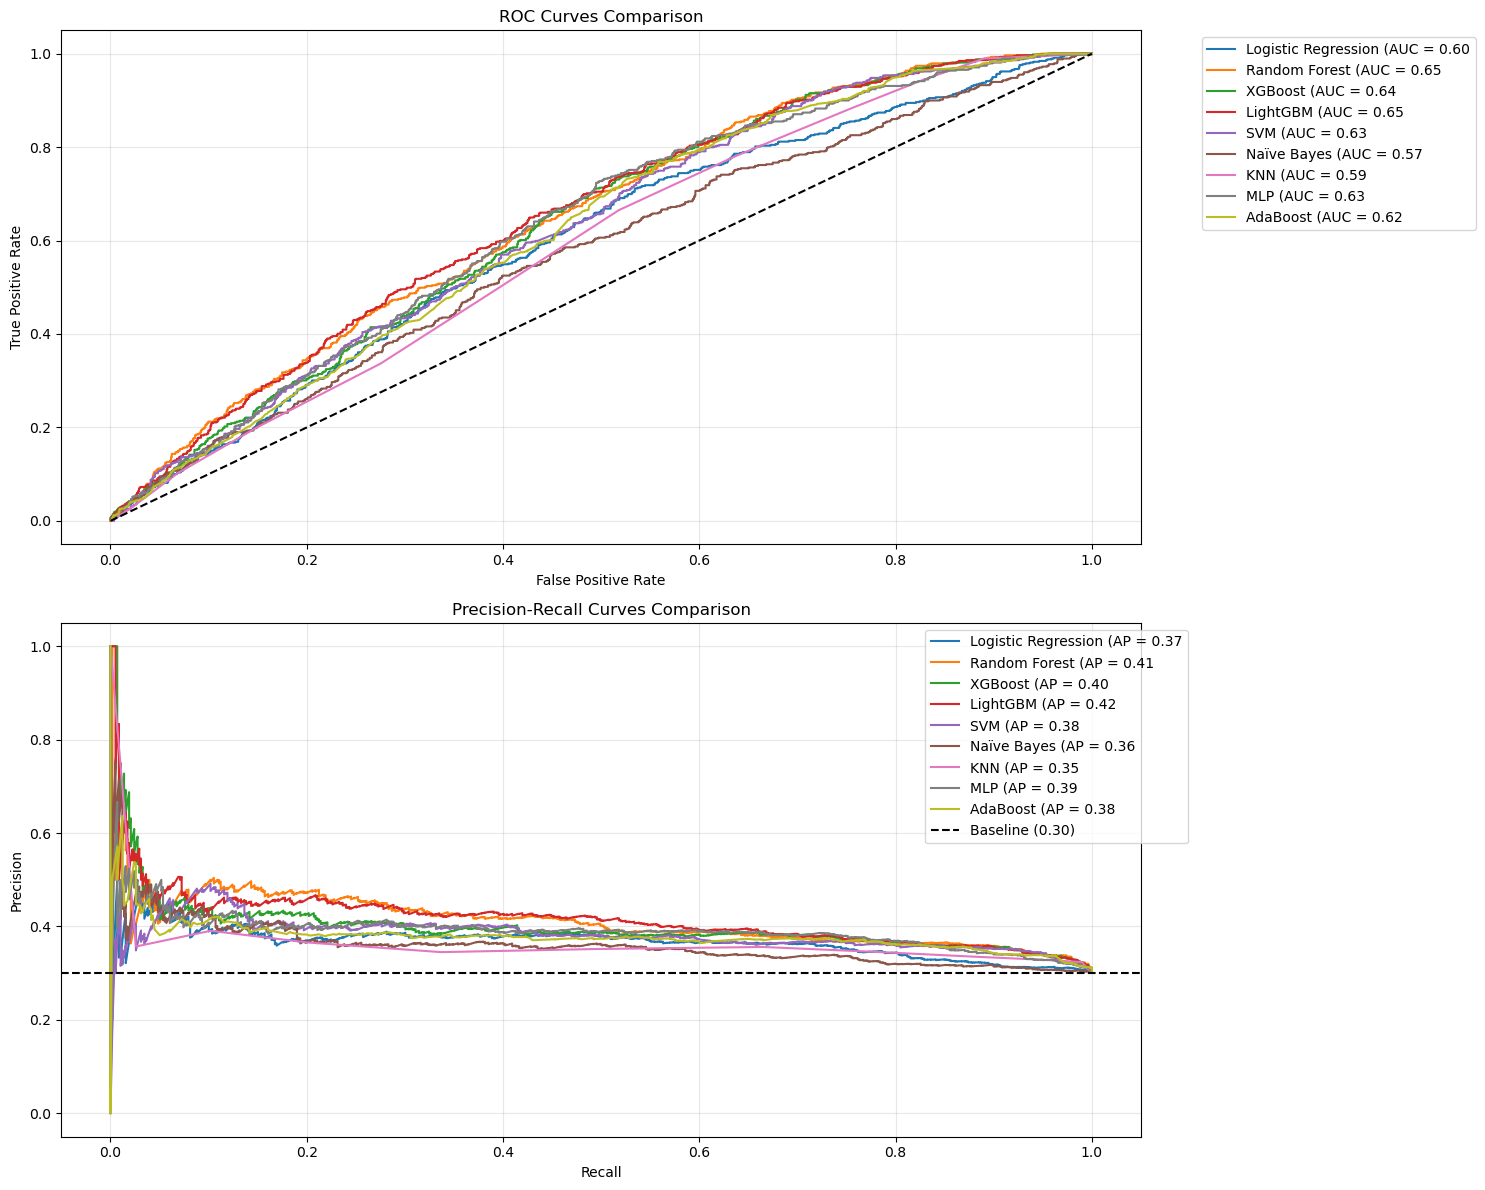

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load and preprocess data
# ---------------------------------------------------------------
# df = pd.read_csv('your_data.csv')

# Keep only rows with non-missing target
df = df.dropna(subset=['long_acting_user'])

# Convert yes/no columns to binary
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']

for col in yes_no_cols:
    df[col] = np.where(df[col].astype(str).str.lower().str.contains('yes|1'), 1, 0)

# Convert target variable
df['long_acting_user'] = df['long_acting_user'].astype(int)

# Define features and target
y = df['long_acting_user']
X = df.drop('long_acting_user', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Define column types
numeric_features = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_features = ['ur', 'marital_status', 'religion']

# Corrected preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 300],
            'classifier__max_depth': [5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'classifier__max_depth': [3, 5]}
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {'classifier__num_leaves': [20, 30]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'classifier__C': [0.1, 1]}
    },
    'Naïve Bayes': {
        'model': GaussianNB(),
        'params': {'classifier__var_smoothing': np.logspace(-9, -3, 3)}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'classifier__n_neighbors': [5, 10]}
    },
    'MLP': {
        'model': MLPClassifier(max_iter=1000),
        'params': {'classifier__hidden_layer_sizes': [(50,)]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'classifier__n_estimators': [50, 100]}
    }
}

# Training and evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
results = []
roc_data = []
pr_data = []

for model_name, config in models.items():
    try:
        print(f"\n{'='*40}\nTraining {model_name}\n{'='*40}")
        
        # Create complete pipeline
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('knn_imputer', KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('classifier', config['model'])
        ])
        
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=config['params'],
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1
        )
        
        search.fit(X_train, y_train)
        
        # Predictions
        y_pred = search.best_estimator_.predict(X_test)
        y_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
        
        # Store metrics
        results.append({
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'AUC-ROC': roc_auc_score(y_test, y_proba),
            'Avg Precision': average_precision_score(y_test, y_proba)
        })
        
        # Store curve data
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_data.append((model_name, fpr, tpr))
        
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_data.append((model_name, precision, recall))
        
    except Exception as e:
        print(f"Error training {model_name}: {str(e)}")
        continue

# Results reporting
if len(results) == 0:
    print("No models were successfully trained. Check data/configuration.")
else:
    results_df = pd.DataFrame(results)
    print("\nModel Performance Summary:")
    print(results_df.sort_values('AUC-ROC', ascending=False).to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(15, 12))
    
    # ROC Curves
    plt.subplot(2, 1, 1)
    for name, fpr, tpr in roc_data:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {results_df[results_df['Model'] == name]['AUC-ROC'].values[0]:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    # Precision-Recall Curves
    plt.subplot(2, 1, 2)
    baseline = y_test.mean()
    for name, precision, recall in pr_data:
        plt.plot(recall, precision, label=f"{name} (AP = {results_df[results_df['Model'] == name]['Avg Precision'].values[0]:.2f}")
    plt.axhline(baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(r"C:\Users\HP\Desktop\edited\model_performance_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()


Training Logistic Regression
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training Random Forest
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Training XGBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [07:50:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM
Fitting 10 folds for each of 2 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 5373, number of negative: 5373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 10746, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Training KNN
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training MLP
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Training AdaBoost
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Model Performance Summary:
   

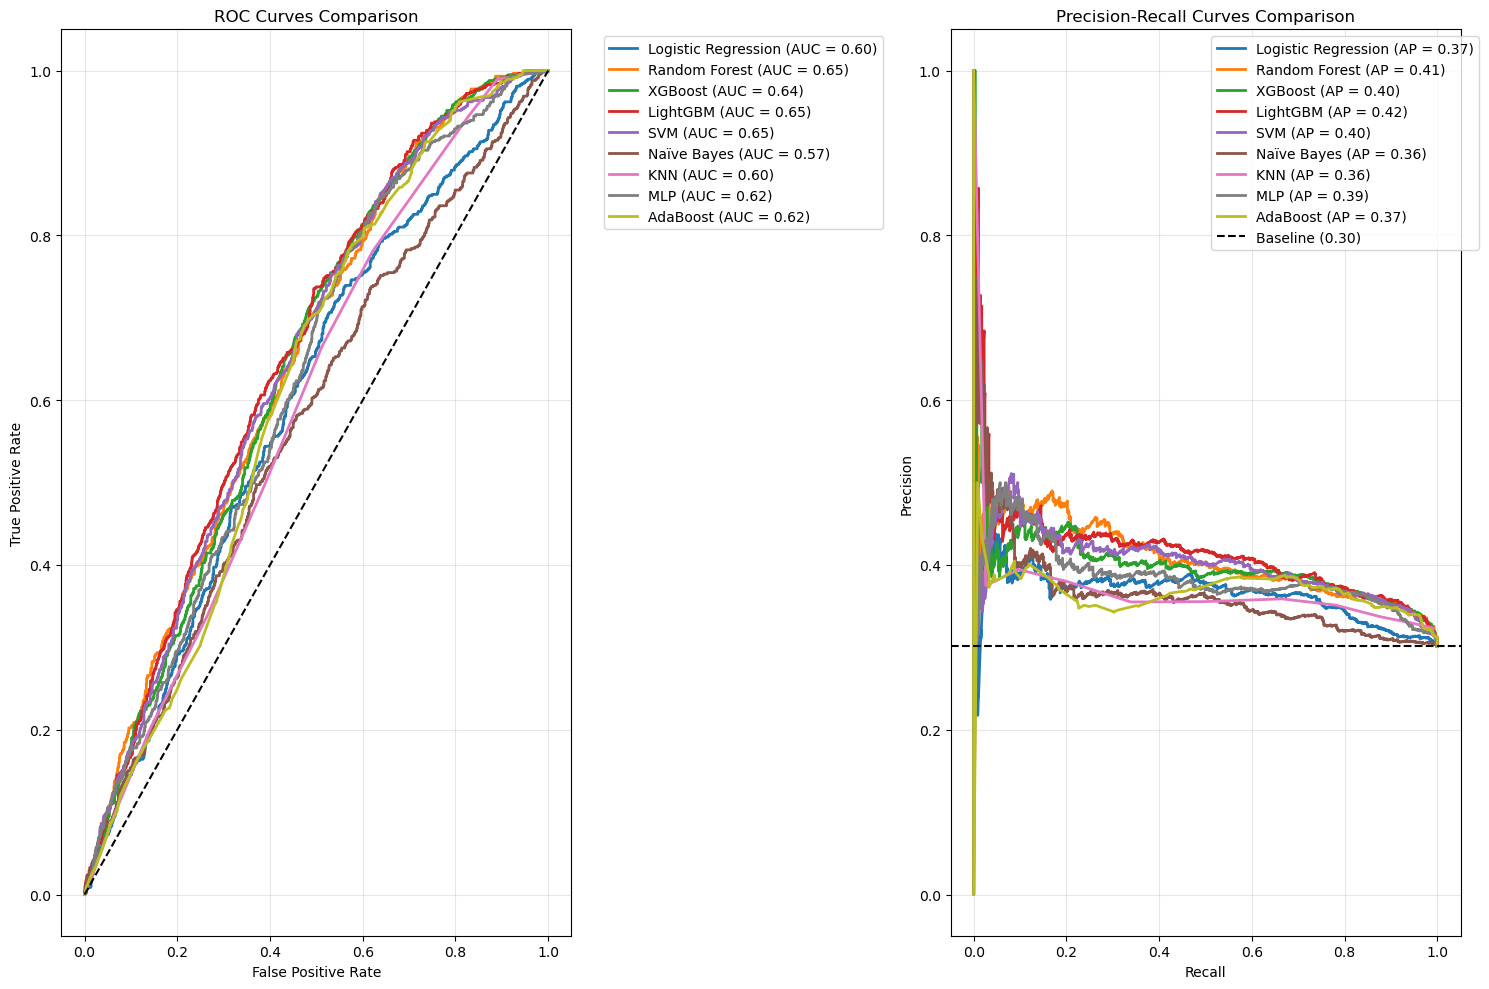

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve, 
                             precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

def plot_validation_curves(grid_search, model_name, param_grid):
    """Plot validation curves for each hyperparameter in the grid"""
    results = grid_search.cv_results_
    n_params = len(param_grid)
    
    fig, axes = plt.subplots(1, n_params, figsize=(5*n_params, 5))
    if n_params == 1:
        axes = [axes]
    
    fig.suptitle(f'Validation Curves - {model_name}', fontsize=14)
    
    for idx, (param_name, param_values) in enumerate(param_grid.items()):
        ax = axes[idx]
        clean_name = param_name.replace('classifier__', '')
        
        # Extract scores
        train_scores = results[f'mean_train_score']
        test_scores = results[f'mean_test_score']
        param_display = results[f'param_{param_name}'].data
        
        # Handle different parameter types
        if isinstance(param_values[0], (int, float)):
            ax.plot(param_display, train_scores, 'o-', label='Training Score')
            ax.plot(param_display, test_scores, 'o-', label='Validation Score')
            ax.set_xlabel(clean_name)
        else:
            x_ticks = np.arange(len(param_values))
            ax.plot(x_ticks, train_scores, 'o-', label='Training Score')
            ax.plot(x_ticks, test_scores, 'o-', label='Validation Score')
            ax.set_xticks(x_ticks)
            ax.set_xticklabels([str(v) for v in param_values], rotation=45)
            ax.set_xlabel(clean_name)
        
        ax.set_ylabel('AUC-ROC Score')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig(fr"C:\Users\HP\Desktop\edited\validation_curve_{model_name.replace(' ', '_')}.png", 
                bbox_inches='tight', dpi=300)
    plt.close()
df = df.dropna(subset=['long_acting_user'] + [
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
])
# Load and preprocess data
# ---------------------------------------------------------------
# Assuming df is your cleaned DataFrame
# Example cleaning steps:
# Handle yes/no columns
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']

for col in yes_no_cols:
    df[col] = np.where(df[col].astype(str).str.lower().str.contains('yes|1'), 1, 0)

# Convert target variable
df['long_acting_user'] = df['long_acting_user'].astype(int)

# Train-test split
X = df.drop('long_acting_user', axis=1)
y = df['long_acting_user']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Preprocessing pipeline
numeric_features = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_features = ['ur', 'marital_status', 'religion']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'classifier__max_depth': [3, 5]}
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {'classifier__num_leaves': [20, 30]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'classifier__C': [0.1, 1]}
    },
    'Naïve Bayes': {
        'model': GaussianNB(),
        'params': {'classifier__var_smoothing': np.logspace(-9, -3, 3)}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'classifier__n_neighbors': [5, 10]}
    },
    'MLP': {
        'model': MLPClassifier(max_iter=1000),
        'params': {'classifier__hidden_layer_sizes': [(50,), (100,)]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'classifier__n_estimators': [50, 100]}
    }
}

# Training and evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
results = []
roc_data = []
pr_data = []

for model_name, config in models.items():
    try:
        print(f"\n{'='*40}\nTraining {model_name}\n{'='*40}")
        
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', config['model'])
        ])
        
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=config['params'],
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1,
            return_train_score=True
        )
        
        search.fit(X_train, y_train)
        
        # Plot validation curves
        plot_validation_curves(search, model_name, config['params'])
        
        # Get predictions
        y_pred = search.best_estimator_.predict(X_test)
        y_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
        
        # Store results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'AUC-ROC': roc_auc_score(y_test, y_proba),
            'Avg Precision': average_precision_score(y_test, y_proba)
        })
        
        # Store curve data
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_data.append((model_name, fpr, tpr))
        
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_data.append((model_name, precision, recall))
        
    except Exception as e:
        print(f"Error training {model_name}: {str(e)}")
        continue

# Performance reporting
if len(results) == 0:
    print("No models were successfully trained. Check data/configuration.")
else:
    results_df = pd.DataFrame(results)
    print("\nModel Performance Summary:")
    print(results_df.sort_values('AUC-ROC', ascending=False).to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # ROC Curves
    plt.subplot(1, 2, 1)
    for name, fpr, tpr in roc_data:
        plt.plot(fpr, tpr, lw=2, 
                 label=f"{name} (AUC = {results_df[results_df['Model']==name]['AUC-ROC'].values[0]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    # Precision-Recall Curves
    plt.subplot(1, 2, 2)
    baseline = y_test.mean()
    for name, precision, recall in pr_data:
        plt.plot(recall, precision, lw=2,
                 label=f"{name} (AP = {results_df[results_df['Model']==name]['Avg Precision'].values[0]:.2f})")
    plt.axhline(baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(r"C:\Users\HP\Desktop\edited\model_performance_comparison.png", 
                dpi=300, bbox_inches='tight')
    plt.show()


Training MLP
Fitting 10 folds for each of 8 candidates, totalling 80 fits


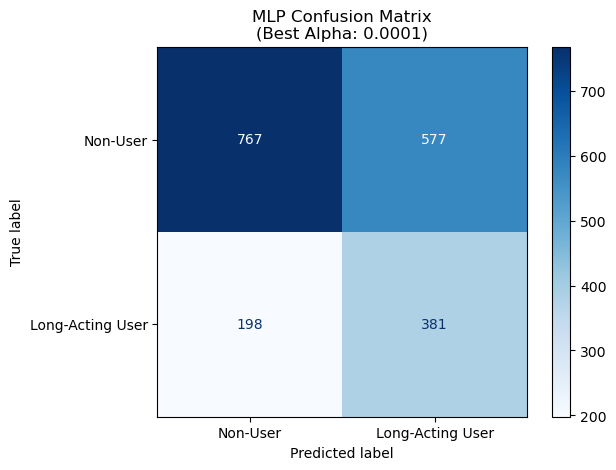


MLP Classification Report:
Error training MLP: name 'classification_report' is not defined


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Update MLP configuration
models = {
    # ... keep other models as-is ...
    'MLP': {
        'model': MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=True,
            random_state=42,
            max_iter=1000
        ),
        'params': {
            'classifier__hidden_layer_sizes': [(100, 50), (50, 25)],  # 2 hidden layers
            'classifier__alpha': [0.0001, 0.001, 0.01, 0.1]  # L2 regularization
        }
    }
}

# Modified training loop section
for model_name, config in models.items():
    try:
        print(f"\n{'='*40}\nTraining {model_name}\n{'='*40}")
        
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', config['model'])
        ])
        
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=config['params'],
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1,
            return_train_score=True
        )
        
        search.fit(X_train, y_train)
        
        # For MLP specifically
        if model_name == 'MLP':
            # Get best estimator
            best_mlp = search.best_estimator_
            
            # Generate predictions
            y_pred = best_mlp.predict(X_test)
            
            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(
                confusion_matrix=cm,
                display_labels=['Non-User', 'Long-Acting User']
            )
            
            # Plot with annotations
            disp.plot(cmap='Blues', values_format='d')
            plt.title(f'MLP Confusion Matrix\n(Best Alpha: {search.best_params_["classifier__alpha"]})')
            plt.savefig(r"C:\Users\HP\Desktop\edited\mlp_confusion_matrix.png", 
                        bbox_inches='tight', dpi=300)
            plt.show()
            
            # Print metrics
            print("\nMLP Classification Report:")
            print(classification_report(y_test, y_pred))
            print(f"Best Parameters: {search.best_params_}")

    except Exception as e:
        print(f"Error training {model_name}: {str(e)}")
        continue

In [16]:
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

In [17]:
df.columns

Index(['ur', 'age', 'marital_status', 'religion', 'num_HH_members', 'radio',
       'tv', 'school', 'pregnant', 'heard_implants', 'heard_IUD',
       'current_method', 'fp_side_effects', 'fp_ever_used', 'age_at_first_use',
       'visited_by_health_worker', 'visited_a_facility', 'fp_ad_radio',
       'fp_ad_tv', 'fp_ad_magazine', 'age_at_first_use_children',
       'age_at_first_sex', 'wealthquintile', 'long_acting_user'],
      dtype='object')

In [18]:
# Clean yes/no columns more thoroughly
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']

for col in yes_no_cols:
    # Handle missing values and normalize strings
    df[col] = df[col].fillna('No').astype(str).str.strip().str.lower()
    # Convert to binary
    df[col] = np.where(df[col].str.contains('yes|1', na=False), 1, 0).astype(int)

# Convert numeric columns to floats
numeric_cols = ['age', 'num_HH_members', 'age_at_first_sex',
                'age_at_first_use', 'age_at_first_use_children']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [19]:
print(df.dtypes)
# All yes_no_cols should show int64
# All numeric_cols should show float64

ur                            object
age                          float64
marital_status                object
religion                      object
num_HH_members               float64
radio                          int32
tv                             int32
school                        object
pregnant                      object
heard_implants                 int32
heard_IUD                      int32
current_method                object
fp_side_effects                int32
fp_ever_used                   int32
age_at_first_use             float64
visited_by_health_worker       int32
visited_a_facility             int32
fp_ad_radio                    int32
fp_ad_tv                       int32
fp_ad_magazine                 int32
age_at_first_use_children    float64
age_at_first_sex             float64
wealthquintile                object
long_acting_user               int64
dtype: object


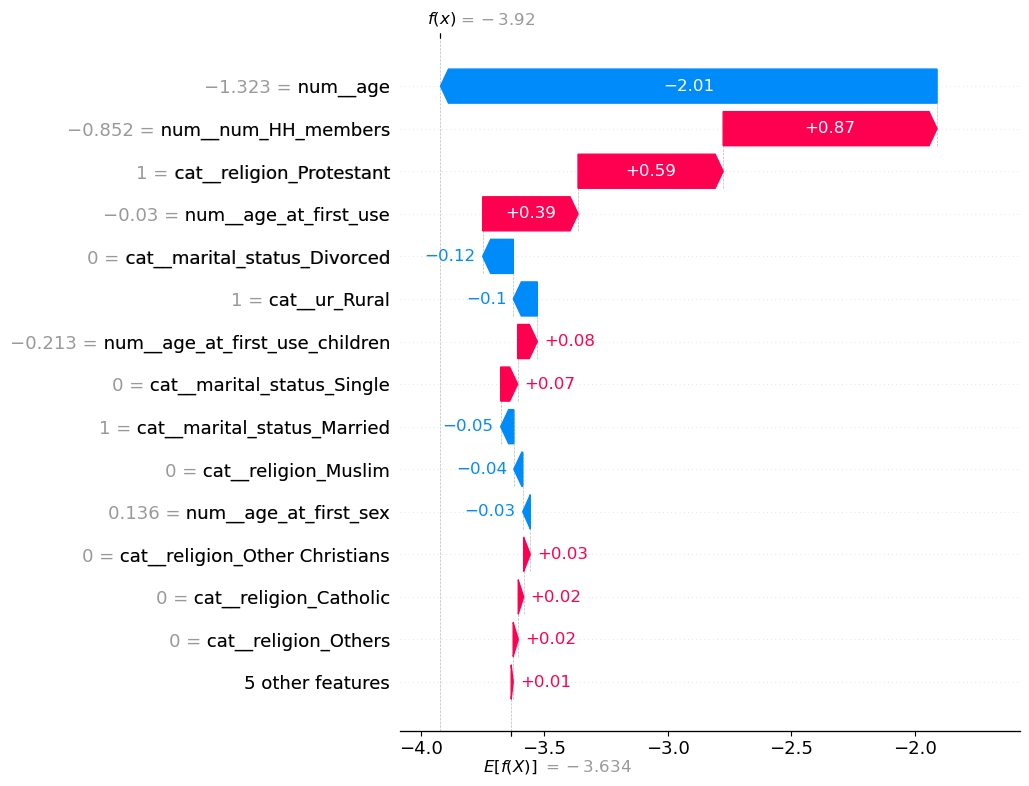

In [22]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load and preprocess data
# ---------------------------------------------------------------
# Assuming df is your cleaned DataFrame with 'long_acting_user' as target
# Make sure to handle missing values and categorical encoding properly

# ... [Keep all previous imports and data loading] ...

# Modified code with fixes:
# ===============================================================
df = df.dropna(subset=['long_acting_user'] + [
    'age', 'num_HH_members', 'age_at_first_sex', 'ur',
    'marital_status', 'religion', 'age_at_first_use',
    'age_at_first_use_children', 'radio', 'tv', 'heard_implants',
    'heard_IUD', 'fp_side_effects', 'fp_ever_used',
    'visited_by_health_worker', 'visited_a_facility',
    'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine'
])
# 1. Remove 'current_method' from features
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']

for col in yes_no_cols:
    df[col] = np.where(df[col].astype(str).str.lower().str.contains('yes|1'), 1, 0)

df['long_acting_user'] = df['long_acting_user'].astype(int)

# 2. Exclude both target variable and 'current_method' from features
X = df.drop(['long_acting_user'], axis=1)  # Modified line
y = df['long_acting_user']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3. Preprocessing pipeline remains the same
numeric_features = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_features = ['ur', 'marital_status', 'religion']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Model training and SHAP explanation with feature names
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = XGBClassifier(random_state=42)
model.fit(X_train_processed, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train_processed)

# 5. Get proper feature names and assign to SHAP values
feature_names = preprocessor.get_feature_names_out()
shap_values.feature_names = feature_names  # Critical fix

# 6. Generate waterfall plot with correct names
shap.plots.waterfall(shap_values[0], max_display=15)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:10:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


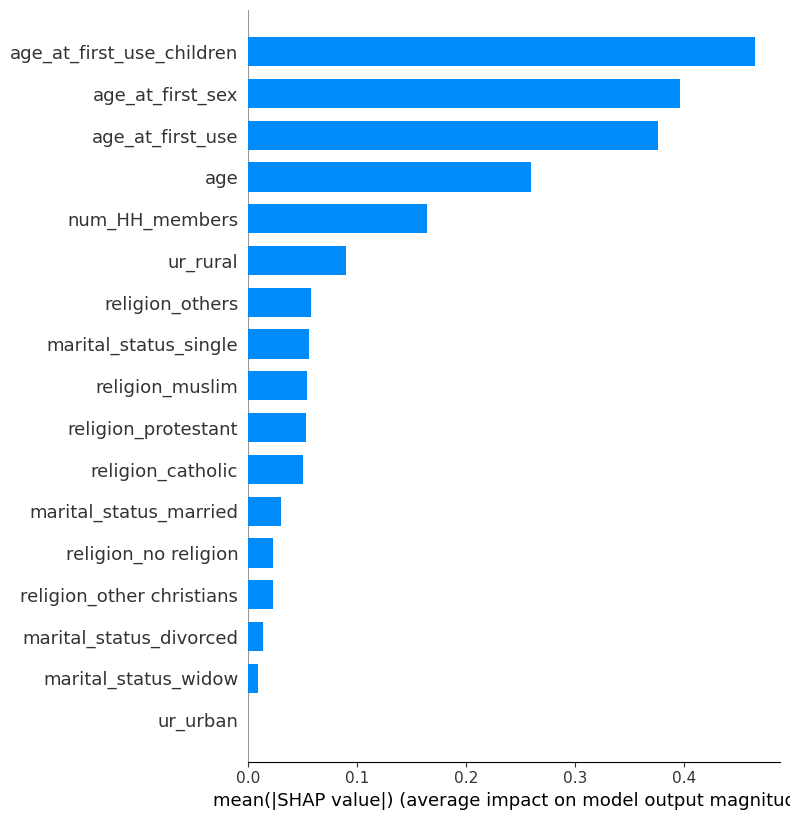


Top 10 Important Features by SHAP Values:
                 features  importance
age_at_first_use_children    0.464339
         age_at_first_sex    0.395715
         age_at_first_use    0.376163
                      age    0.259376
           num_HH_members    0.163774
                 ur_rural    0.089549
          religion_others    0.057371
    marital_status_single    0.055789
          religion_muslim    0.054406
      religion_protestant    0.053494


In [16]:
import shap
# Enhanced preprocessing pipeline with feature names preservation
numeric_features = ['age', 'num_HH_members', 'age_at_first_sex',
                    'age_at_first_use', 'age_at_first_use_children']
categorical_features = ['ur', 'marital_status', 'religion']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ],
    remainder='drop'
)

# Create complete pipeline
full_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit pipeline
full_pipeline.fit(X_train, y_train)

# SHAP Analysis Integration
# ===============================================================
# Extract feature names
numeric_features_processed = numeric_features
categorical_encoder = full_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
categorical_features_processed = categorical_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features_processed, categorical_features_processed])

# Create SHAP explainer
explainer = shap.TreeExplainer(full_pipeline.named_steps['classifier'])
X_processed = full_pipeline.named_steps['preprocessor'].transform(X_train)
shap_values = explainer.shap_values(X_processed)

# Generate SHAP plots
shap.summary_plot(shap_values, X_processed, feature_names=all_feature_names, plot_type='bar')
shap.initjs()

# Create feature importance dataframe
shap_df = pd.DataFrame({
    'features': all_feature_names,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features by SHAP Values:")
print(shap_df.head(10).to_string(index=False))

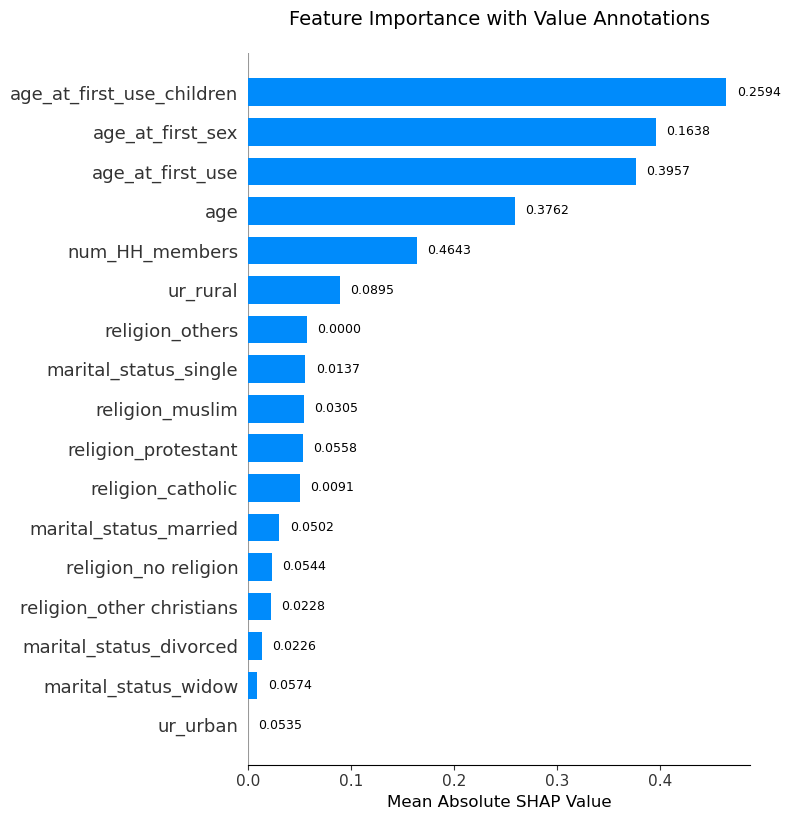


Top 10 Important Features:
                 features  importance
age_at_first_use_children    0.464339
         age_at_first_sex    0.395715
         age_at_first_use    0.376163
                      age    0.259376
           num_HH_members    0.163774
                 ur_rural    0.089549
          religion_others    0.057371
    marital_status_single    0.055789
          religion_muslim    0.054406
      religion_protestant    0.053494


In [17]:
# Generate SHAP summary plot with importance values
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_processed, feature_names=all_feature_names, plot_type='bar', show=False)

# Get current axis and plot data
ax = plt.gca()
bars = ax.patches
y_labels = [t.get_text() for t in ax.get_yticklabels()]
mean_shap_values = np.abs(shap_values).mean(0)[::-1]  # Reverse to match plot order

# Add value annotations
for bar, value in zip(bars, mean_shap_values):
    width = bar.get_width()
    ax.text(width + 0.01,  # X position (right of bar)
            bar.get_y() + bar.get_height()/2,  # Y position (center of bar)
            f'{value:.4f}',  # Formatted value
            va='center', ha='left',
            fontsize=9)

# Add legend and labels
ax.set_xlabel('Mean Absolute SHAP Value', fontsize=12)
ax.set_title('Feature Importance with Value Annotations', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Display top features table
print("\nTop 10 Important Features:")
print(shap_df.head(10).to_string(index=False))

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Load data
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

# 2. Drop rows with missing target
df = df.dropna(subset=['long_acting_user'])

# 3. Convert yes/no to binary
yes_no_cols = ['radio', 'tv', 'heard_implants', 'heard_IUD', 
               'fp_side_effects', 'fp_ever_used', 'visited_by_health_worker',
               'visited_a_facility', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine']
for col in yes_no_cols:
    df[col] = np.where(df[col].astype(str).str.lower().str.contains('yes|1'), 1, 0)

# 4. Target variable
df['long_acting_user'] = df['long_acting_user'].astype(int)
y = df['long_acting_user']
X = df.drop('long_acting_user', axis=1)

# 5. Features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 6. Transformers
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 7. ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 8. Pipeline
svm_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1, random_state=42))
])

# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Fit
svm_pipeline.fit(X_train, y_train)

# 11. Predict and evaluate
y_pred = svm_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2762
           1       1.00      1.00      1.00        93

    accuracy                           1.00      2855
   macro avg       1.00      1.00      1.00      2855
weighted avg       1.00      1.00      1.00      2855



In [ ]:
C:\Users\HP\Desktop\edited\merged Sub saharan.xlsx

In [10]:
import pandas as pd

In [11]:
df=pd.read_excel(r"C:\Users\HP\Desktop\edited\merged Sub saharan.xlsx")

In [12]:
df.columns

Index(['country', 'ur', 'age', 'marital_status', 'religion', 'num_HH_members',
       'radio', 'tv', 'school', 'pregnant', 'heard_implants', 'heard_IUD',
       'current_user', 'current_method', 'fp_side_effects', 'fp_ever_used',
       'age_at_first_use', 'age_at_first_use_children',
       'visited_by_health_worker', 'visited_a_facility',
       'facility_fp_discussion', 'fp_ad_radio', 'fp_ad_tv', 'fp_ad_magazine',
       'age_at_first_sex', 'wealthquintile'],
      dtype='object')

In [13]:
country_counts = df['country'].value_counts()
print(country_counts)

country
Kenya            3757
Uganda           2136
Ethiopia         1966
Burkina faso     1508
Ghana            1167
Cotedivoire      1012
Burkina faso      829
Niger             705
Dr congo          631
Nigeria           564
Name: count, dtype: int64


In [15]:
import pandas as pd

# Load data
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")

# Calculate counts and percentages for all columns
results = []
for col in df.columns:
    # Get value counts
    count_series = df[col].value_counts(dropna=False).rename('Count')
    
    # Get percentages (including missing values)
    percent_series = df[col].value_counts(dropna=False, normalize=True).mul(100).round(2).rename('Percentage')
    
    # Combine into DataFrame
    col_stats = pd.concat([count_series, percent_series], axis=1)
    col_stats['Column'] = col  # Add column name reference
    
    results.append(col_stats)

# Combine all results
final_df = pd.concat(results).reset_index()
final_df.columns = ['Category', 'Count', 'Percentage', 'Column']

# Reorder columns
final_df = final_df[['Column', 'Category', 'Count', 'Percentage']]

# Save to Excel
final_df.to_excel(r"C:\Users\HP\Desktop\column_counts_percentages.xlsx", index=False)

print("Counts and percentages saved successfully!")

Counts and percentages saved successfully!


In [ ]:
df=pd.read_csv(r"C:\Users\HP\Desktop\PMA\merged_Sub_saharan_processed.csv")